## Carregamento do dataset

In [1]:
from scipy.io import loadmat
import numpy as np

f = loadmat("AVI_SSVEP_Dataset_MAT/multi/Sub1_1_multitarget.mat")
f2 = loadmat("AVI_SSVEP_Dataset_MAT/multi/Sub1_2_multitarget.mat")

In [2]:
print(np.unique(f['Data'][0][0]['TargetFrequency'][0]))
print(np.unique(f2['Data'][0][0]['TargetSize'][0]))
print(f2['Data'][0][0]['TargetFrequency'][0])

[6.  7.  7.5 8.2]
['1.7 cm']
[9.3 6.  6.  8.2 6.  6.5 7.5 7.  6.  6. ]


In [3]:
avi_data_multi = list()

for i in range(1,6):
    avi_data_multi.append(list())
    for j in range(1,3):
        avi_data_multi[i-1].append(loadmat(f"AVI_SSVEP_Dataset_MAT/multi/Sub{i}_{j}_multitarget.mat"))

np.array(avi_data_multi[0][0]['Data'][0][0]['EEG']).shape

(8192, 10)

In [4]:
X, y = list(), list() 
for subject in avi_data_multi:
    X.append(list())
    y.append(list())
    for trial in subject:
        #transposto
        X[-1].append(trial['Data'][0][0]['EEG'].T)
        y[-1].append(trial['Data'][0][0]['TargetFrequency'][0].T.flatten())

data = np.array(X)
data.shape

(5, 2, 10, 8192)

In [5]:
concatenated_X = data.reshape(5, 2 * 10, 8192)
print(concatenated_X.shape)

(5, 20, 8192)


In [6]:
label = np.array(y)
label.shape

(5, 2, 10)

In [7]:
concatenated_y= label.reshape(5,20)
print(concatenated_y.shape)

(5, 20)


In [8]:
for i, subject in enumerate(concatenated_X):
    np.save(f"data_{i}.npy", subject)
    np.save(f"label_{i}.npy", concatenated_y[i])

concatenated_X[0].shape

(20, 8192)

## Apresentação dos gráficos SSVEP

In [9]:
import mne

# criação de um objeto "info"
n_channels = 1
sfreq = 512
ch_names = ['Oz']
ch_types = ['eeg']
info = mne.create_info(ch_names, sfreq=sfreq, ch_types=ch_types)
info

<Info | 7 non-empty values
 bads: []
 ch_names: Oz
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 512.0 Hz
>

In [10]:
concatenated_X = concatenated_X.reshape(5*20, 8192)
concatenated_X.shape

(100, 8192)

In [11]:
data_correct = concatenated_X.reshape(concatenated_X.shape[0], 1, concatenated_X.shape[1])
print(data_correct.shape)

(100, 1, 8192)


In [12]:
print(concatenated_y.shape)
concatenated_y = concatenated_y.flatten()
concatenated_y.shape

(5, 20)


(100,)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
events = np.column_stack((
    np.array(range(len(concatenated_y))),
    np.zeros(concatenated_y.shape[0], dtype=int),
    le.fit_transform(concatenated_y))
)


In [14]:
print(np.unique(f['Data'][0][0]['TargetFrequency'][0]))
print(np.unique(f2['Data'][0][0]['TargetSize'][0]))
print(f2['Data'][0][0]['TargetFrequency'][0])

[6.  7.  7.5 8.2]
['1.7 cm']
[9.3 6.  6.  8.2 6.  6.5 7.5 7.  6.  6. ]


In [15]:
event_dict = {'6':0, '6.5': 1, '7':2, '7.5':3, '8.2':4, '9.3': 5}

In [16]:
mne_data = mne.EpochsArray(data_correct, info, events, event_id=event_dict)

Not setting metadata
100 matching events found
100 matching events found
No baseline correction applied
0 projection items activated


Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


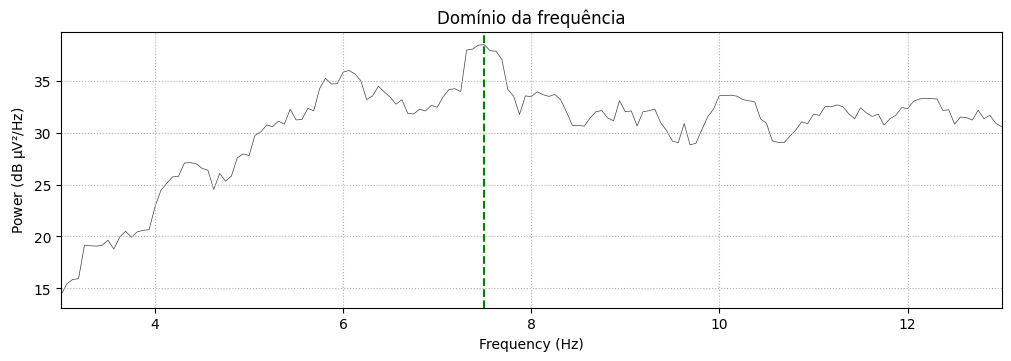

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


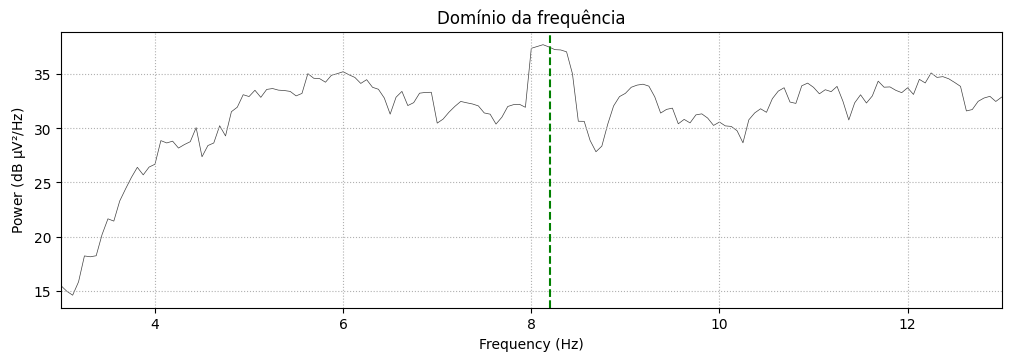

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


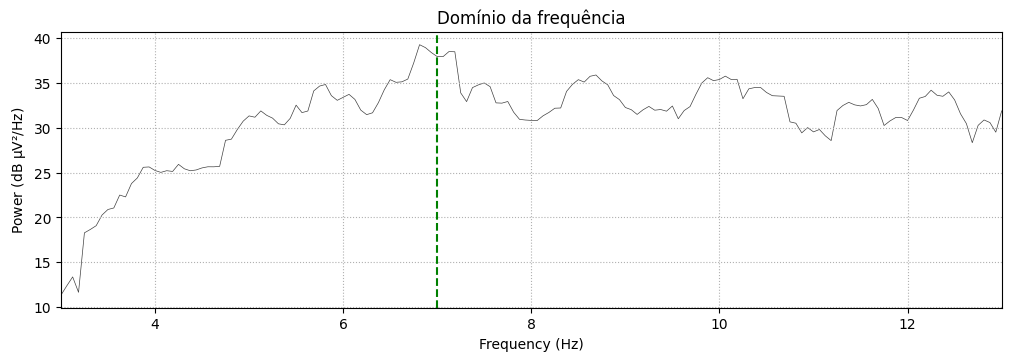

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


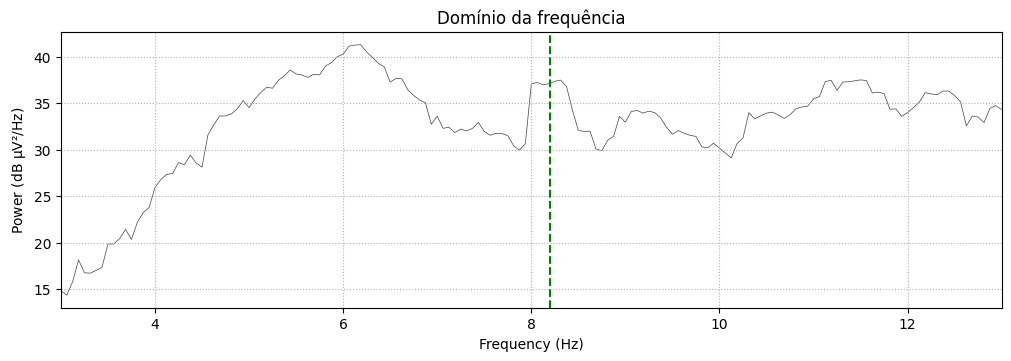

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


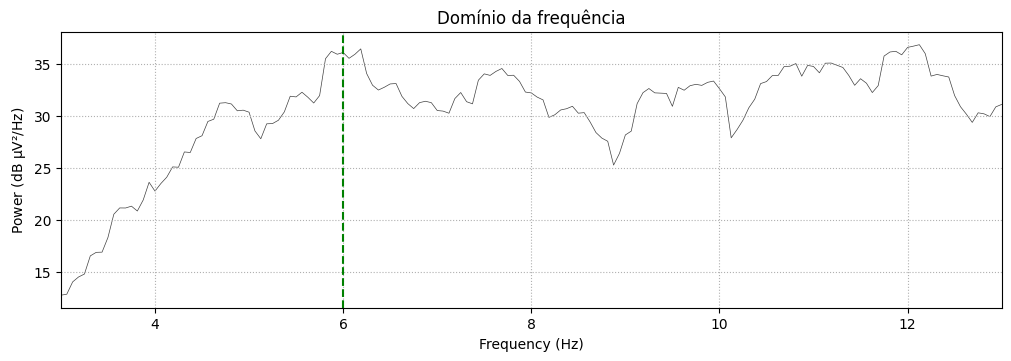

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


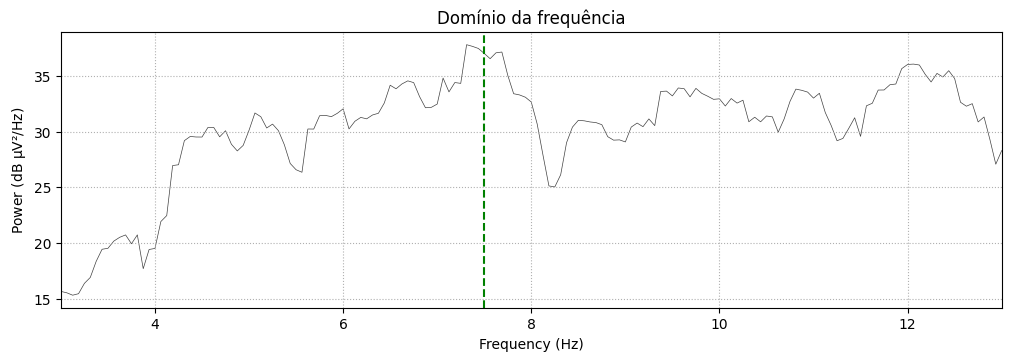

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


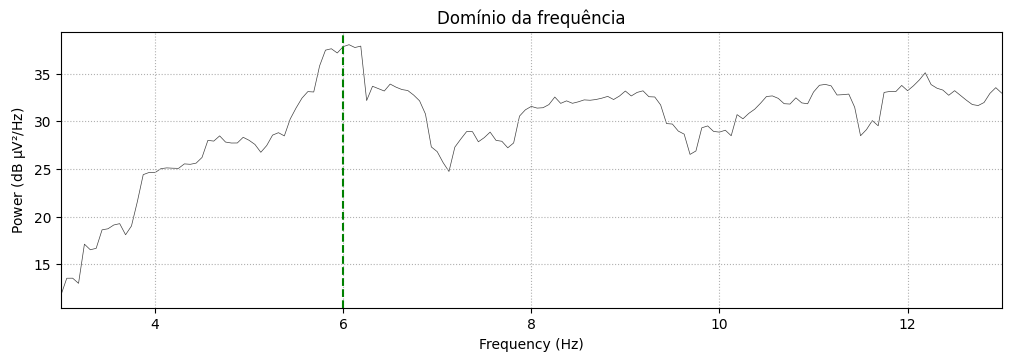

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


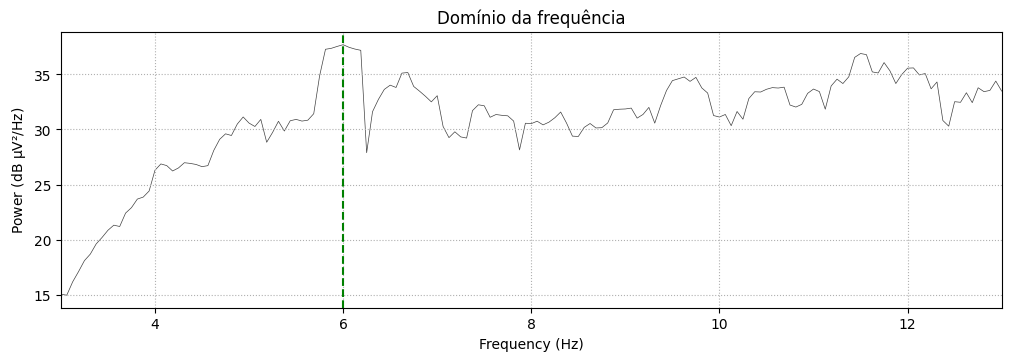

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


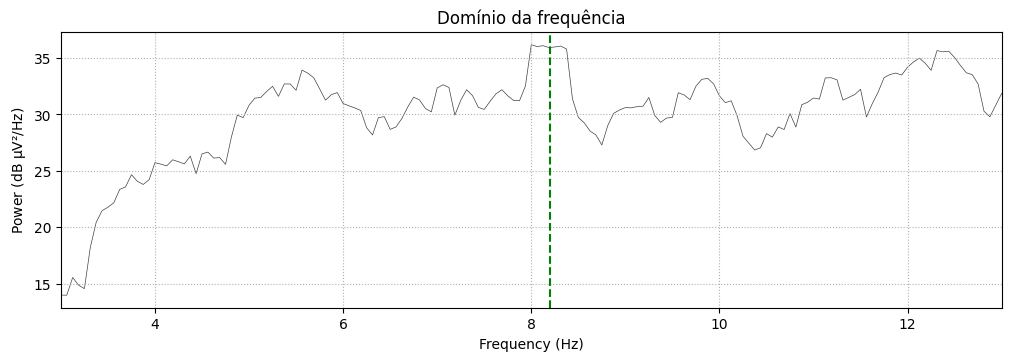

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


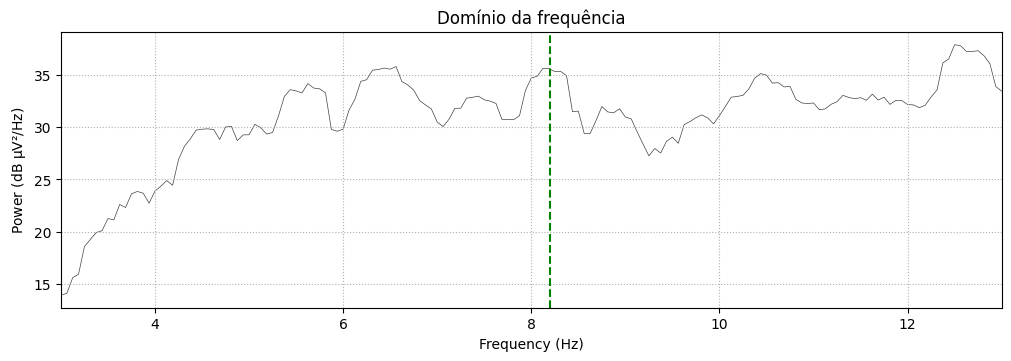

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


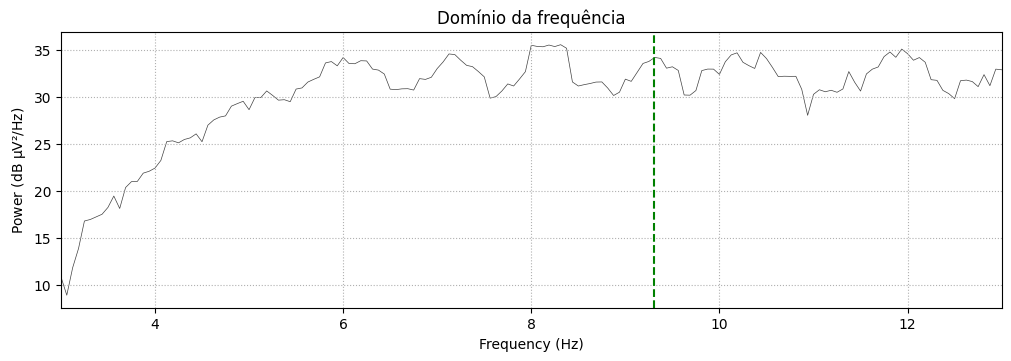

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


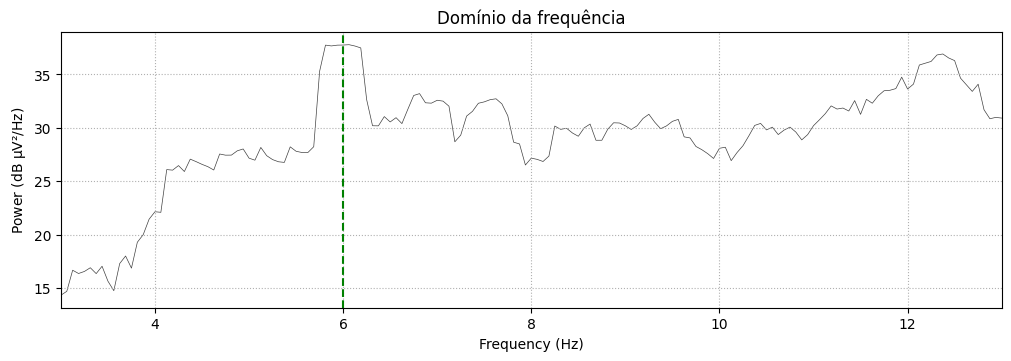

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


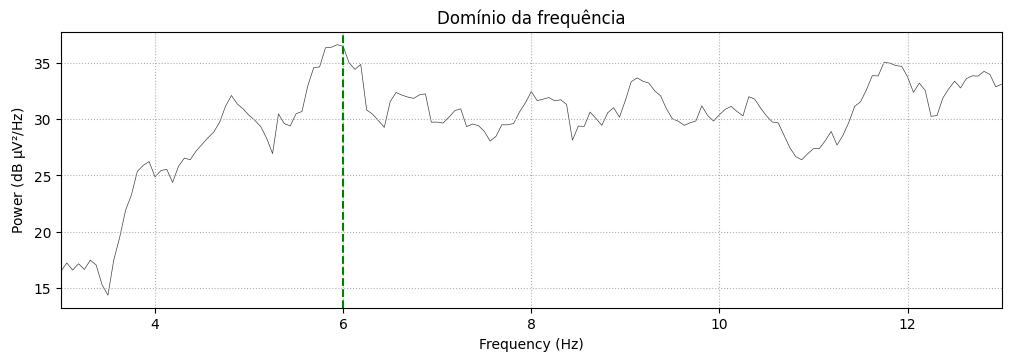

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


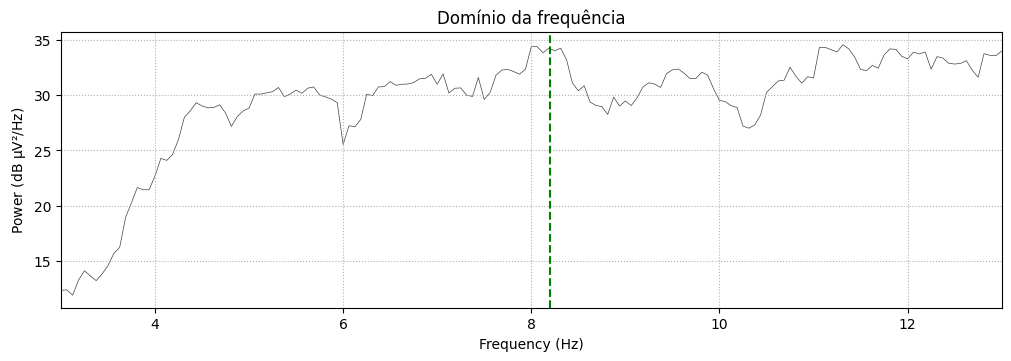

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


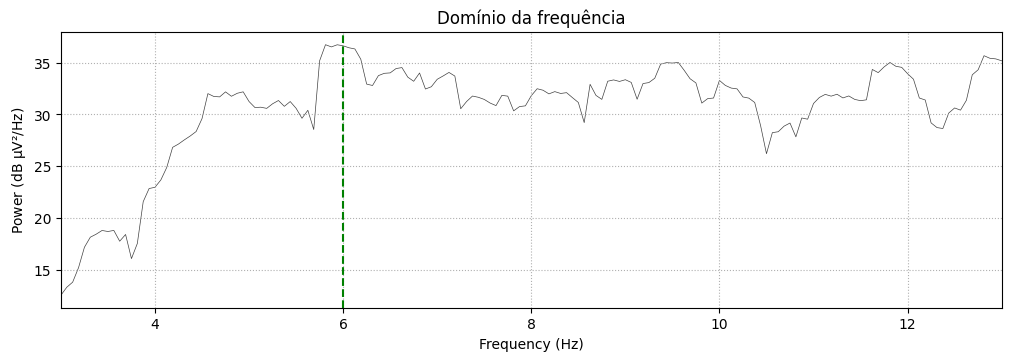

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


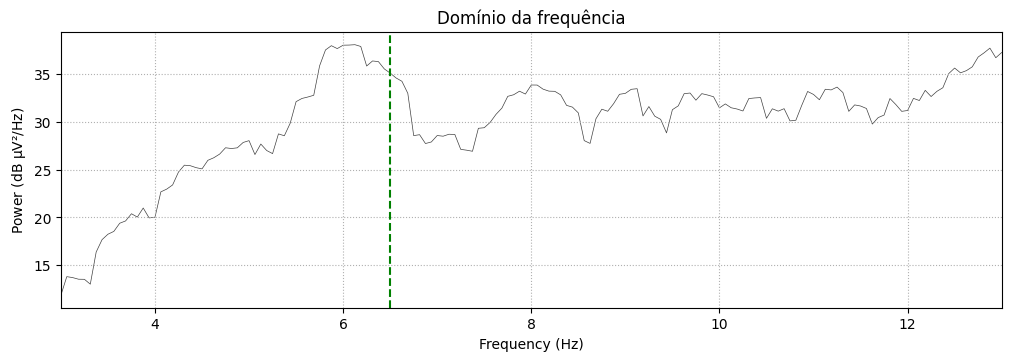

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


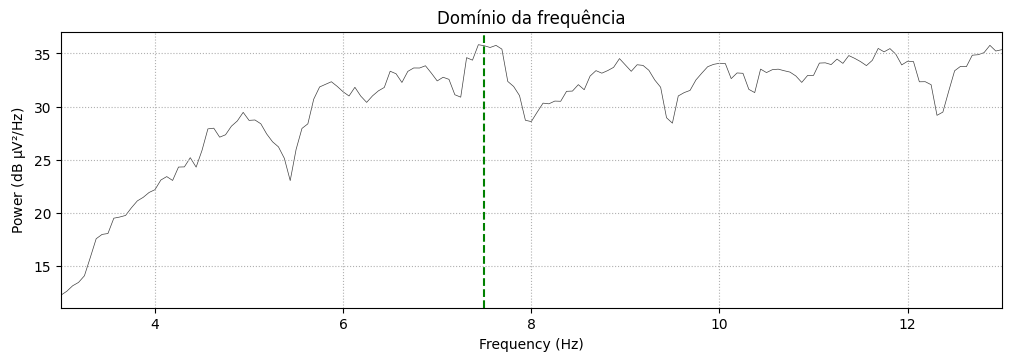

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


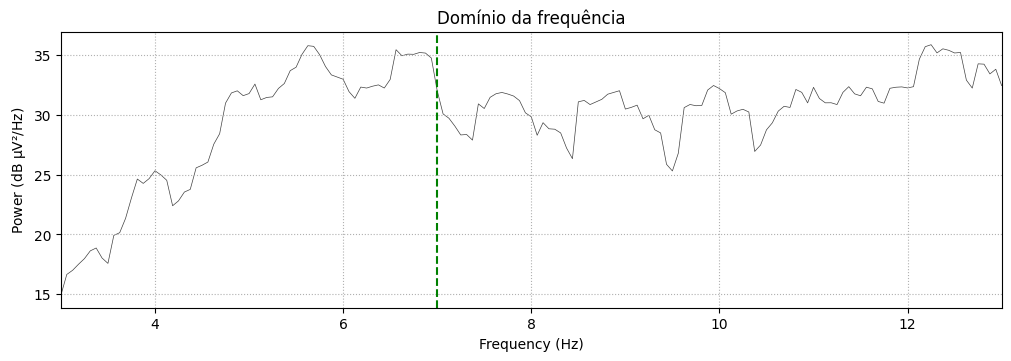

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


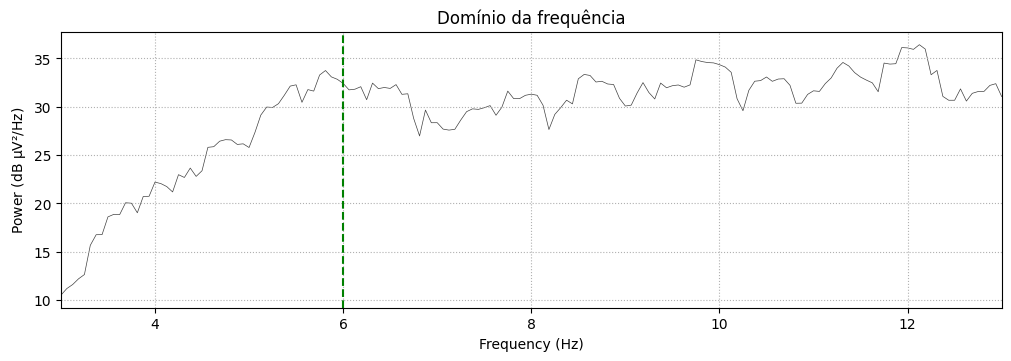

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


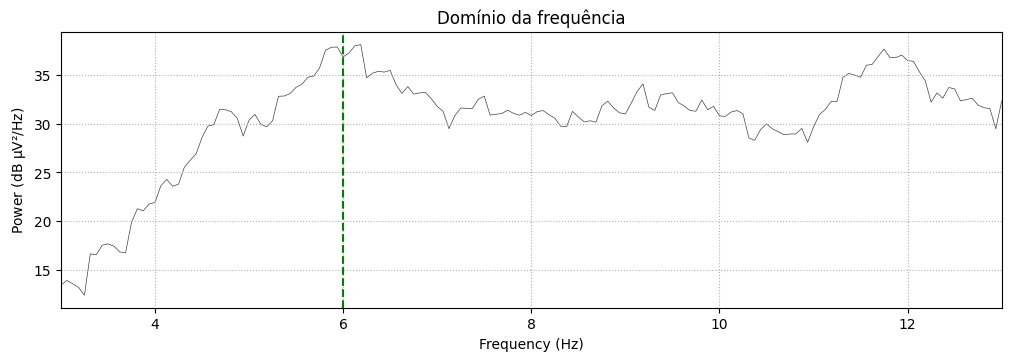

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


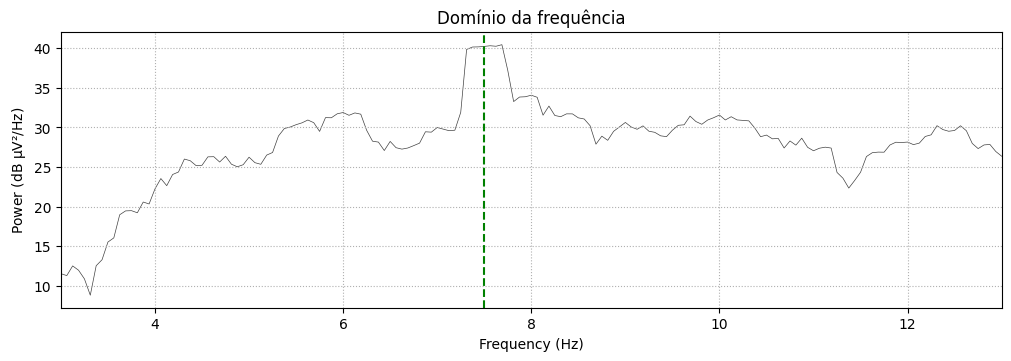

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


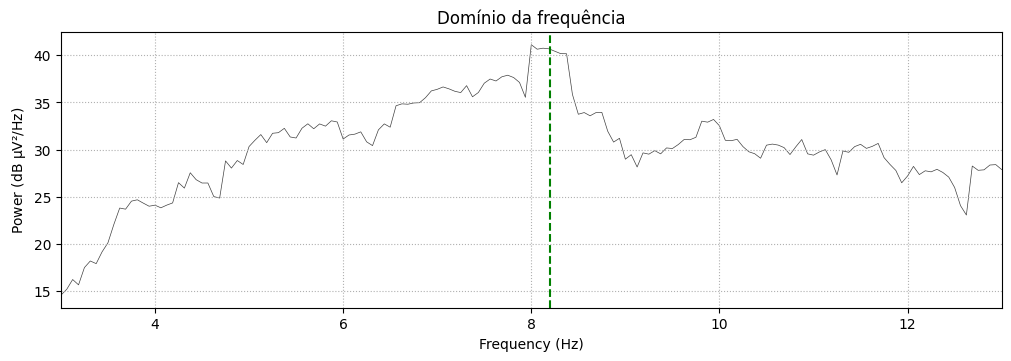

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


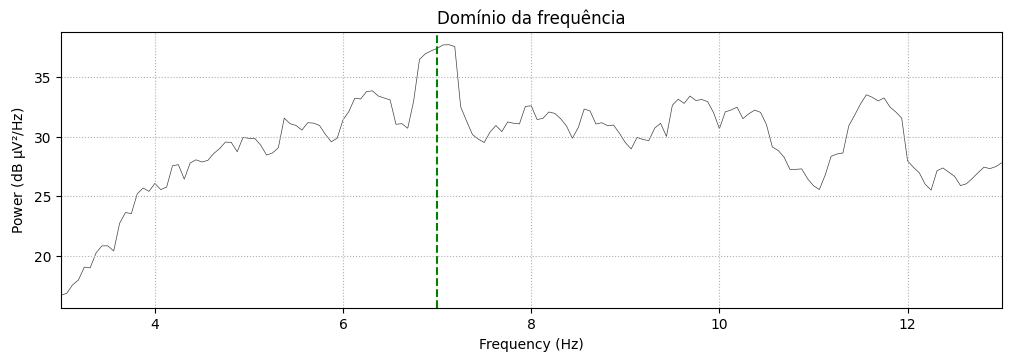

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


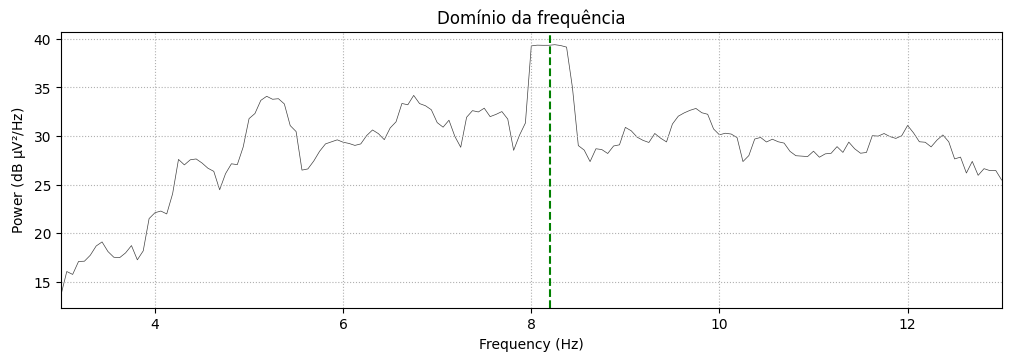

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


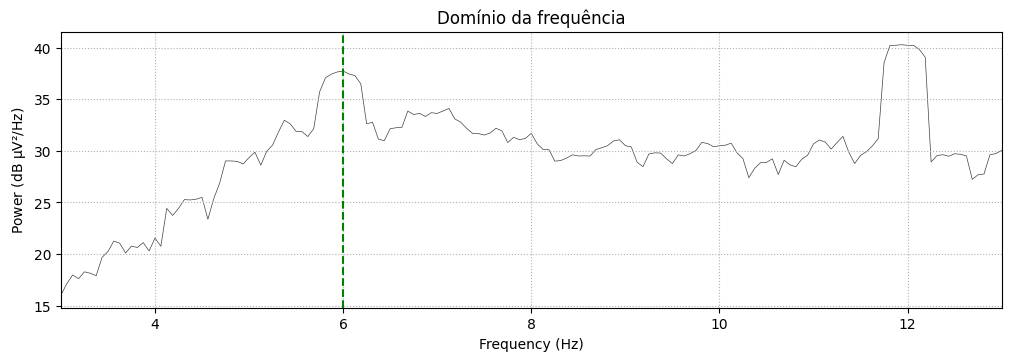

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


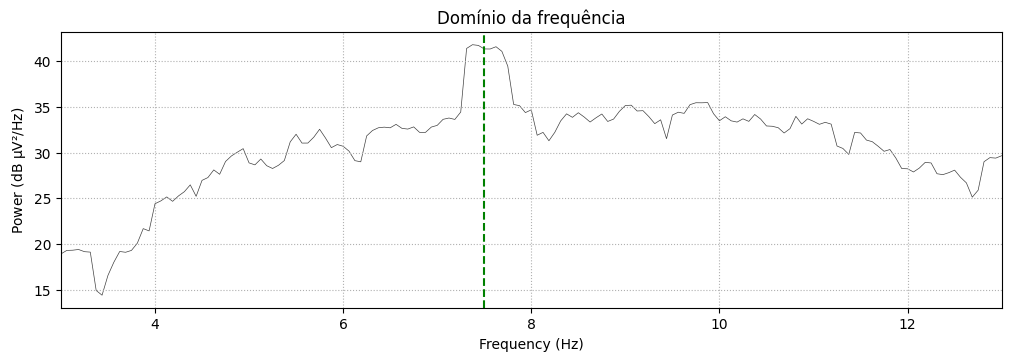

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


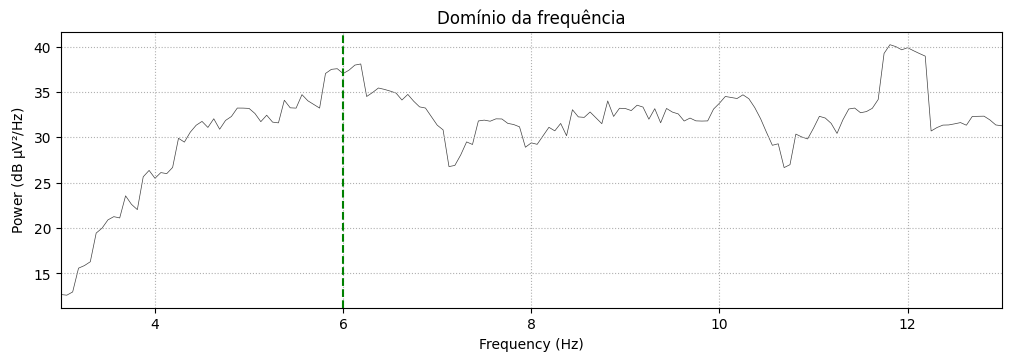

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


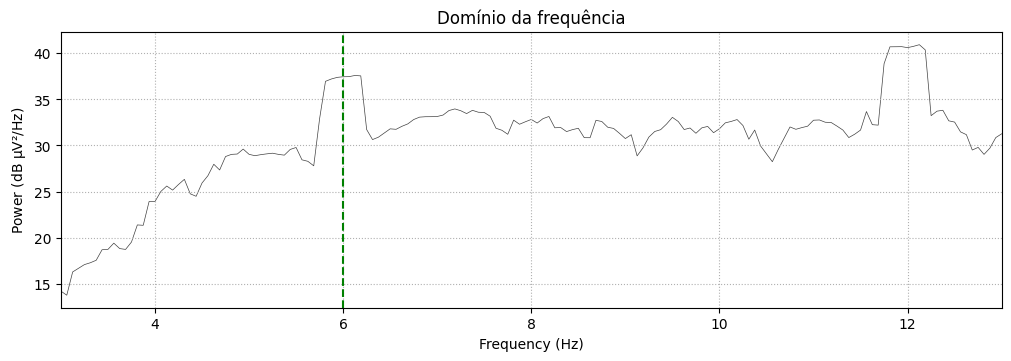

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


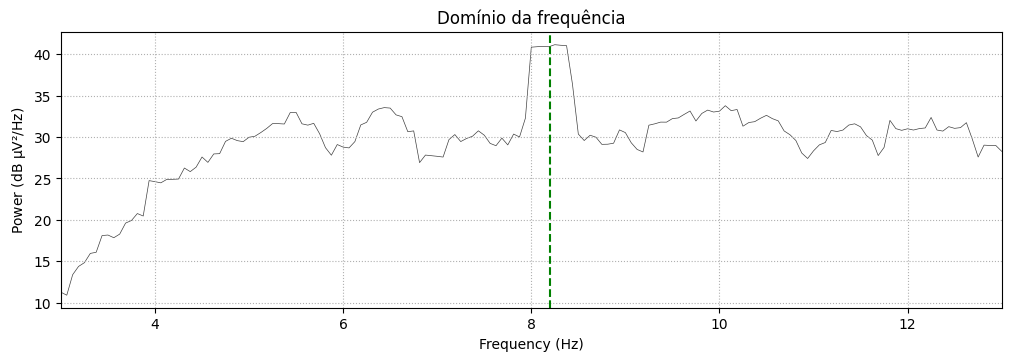

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


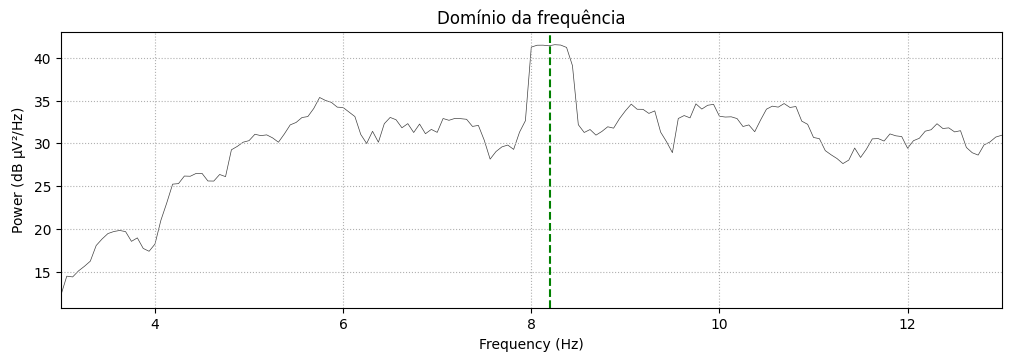

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


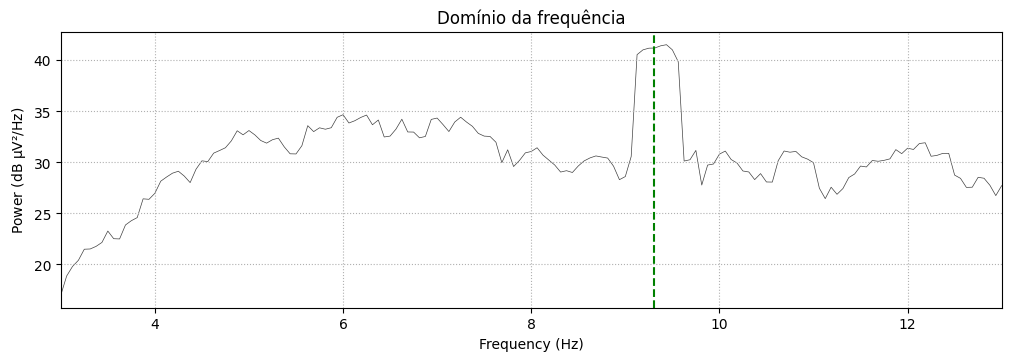

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


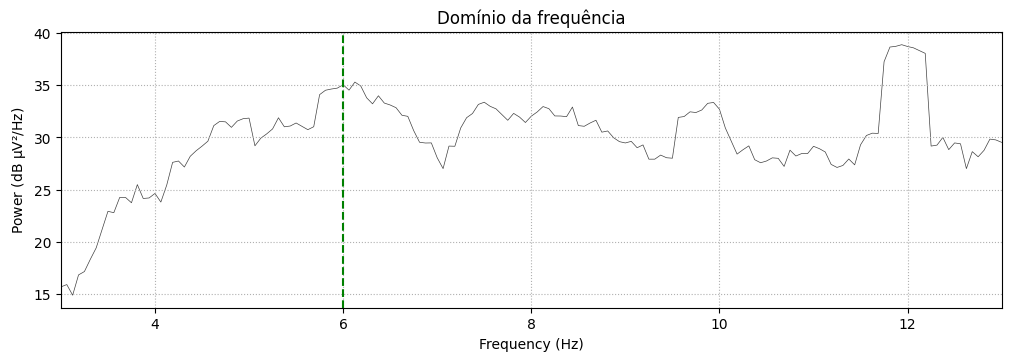

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


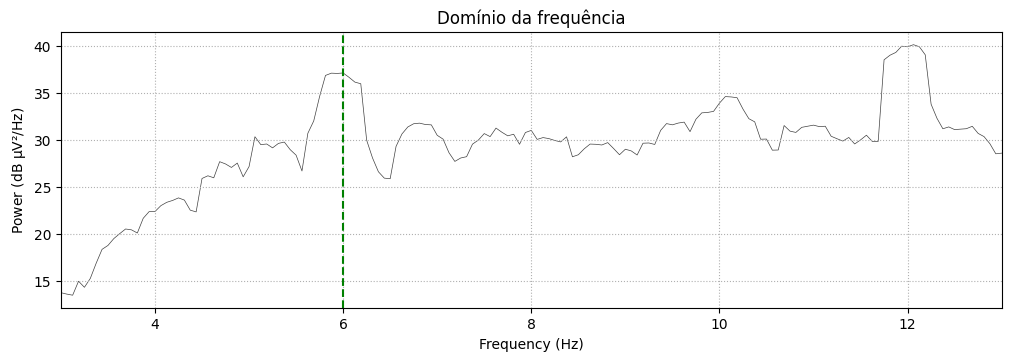

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


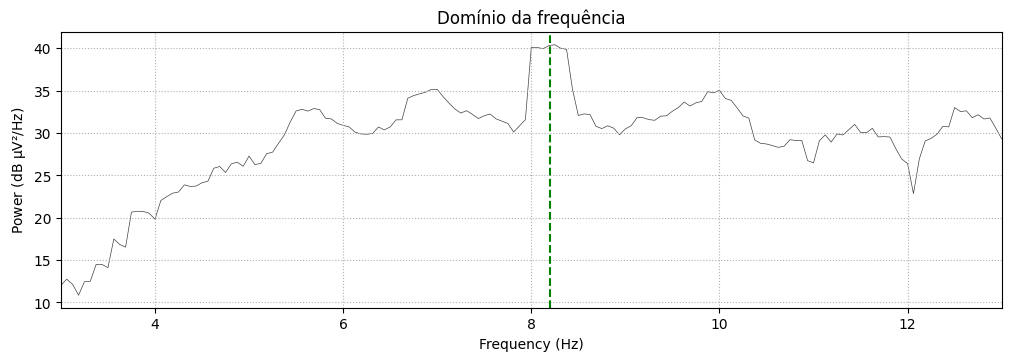

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


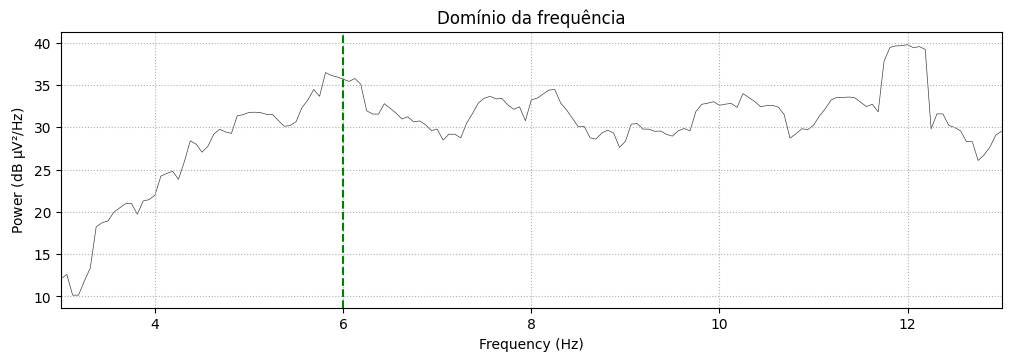

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


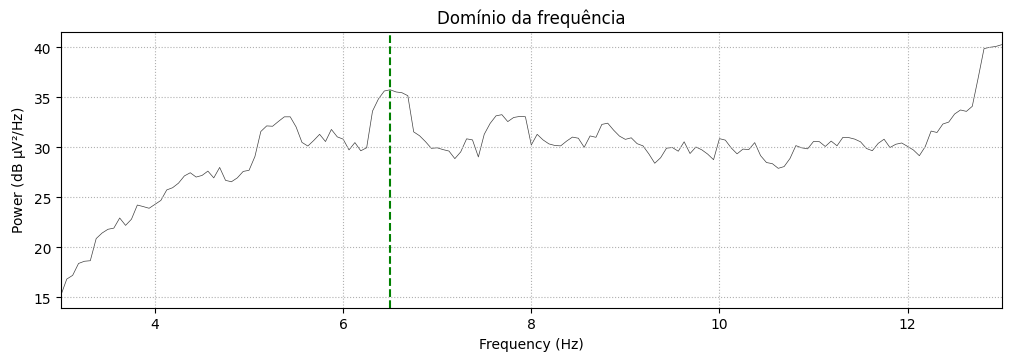

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


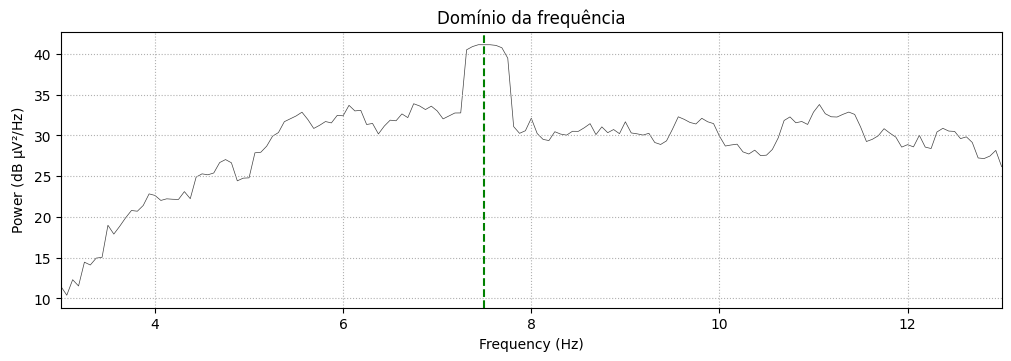

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


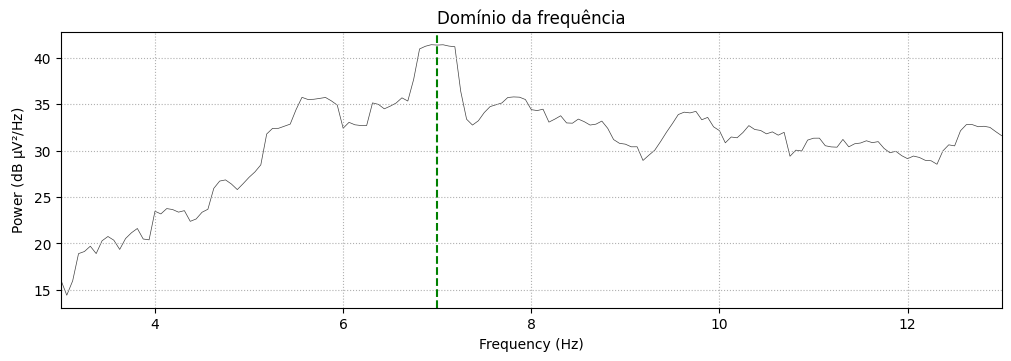

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


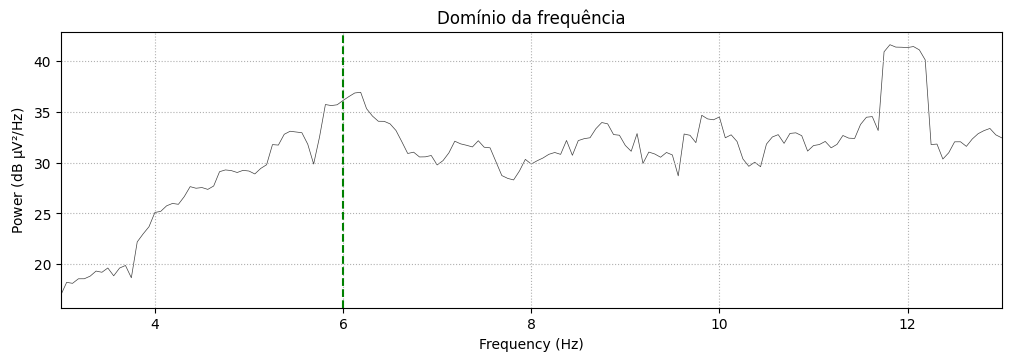

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


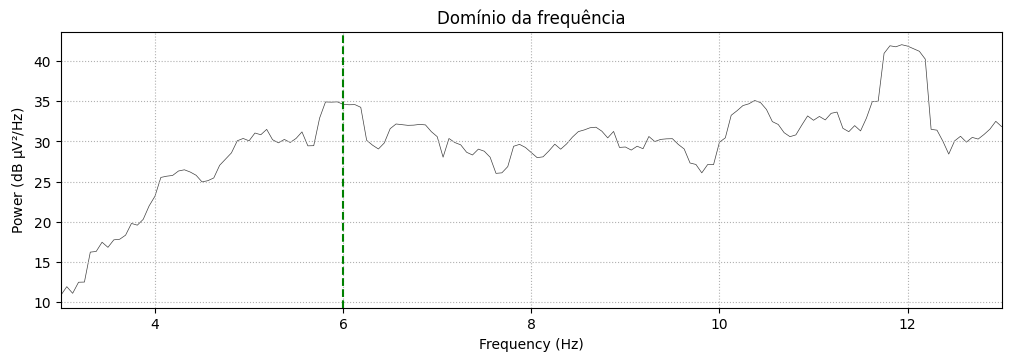

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


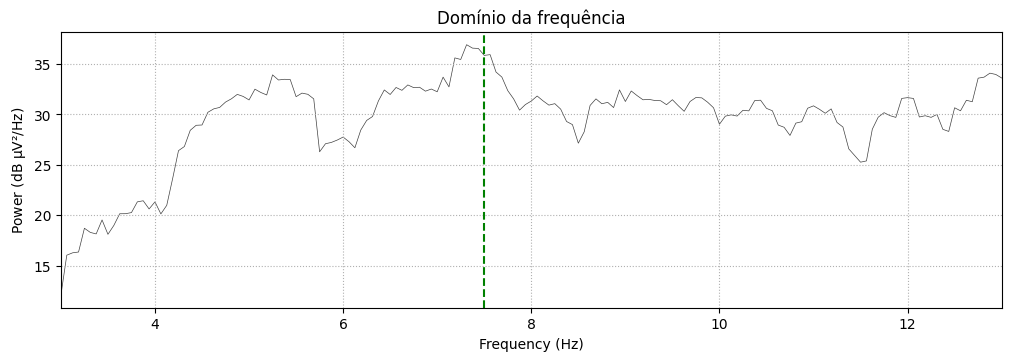

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


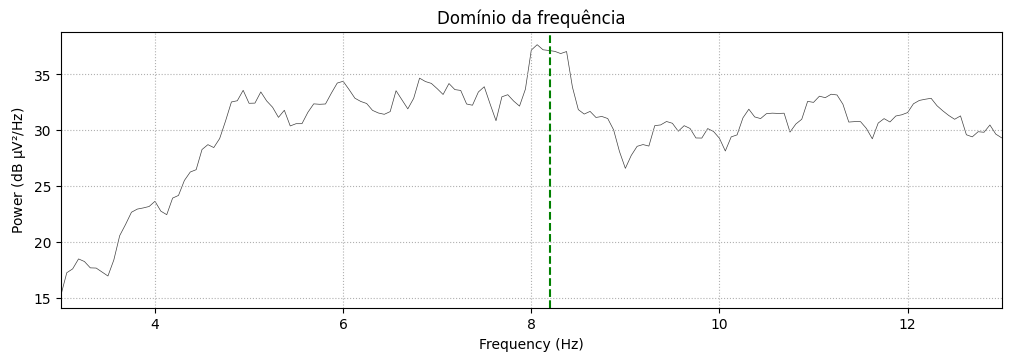

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


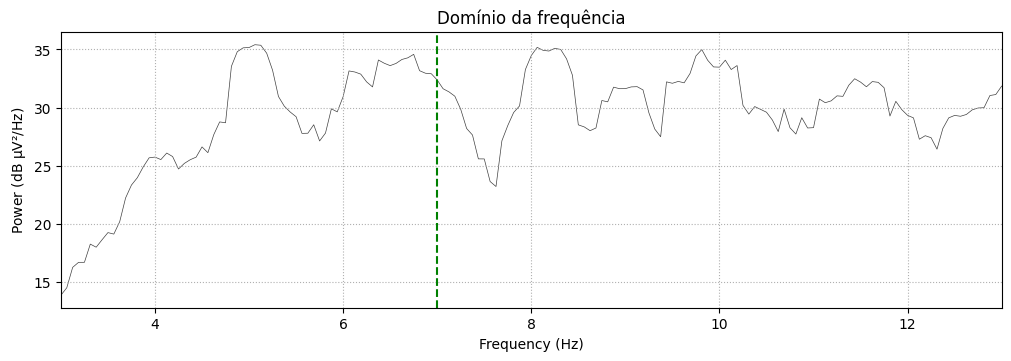

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


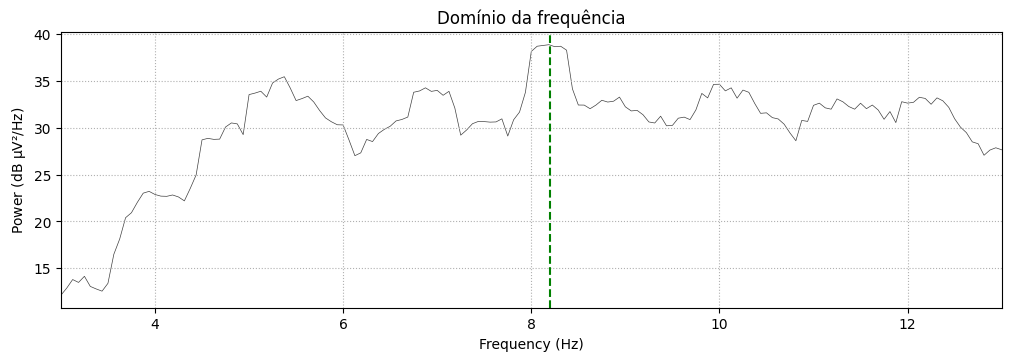

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


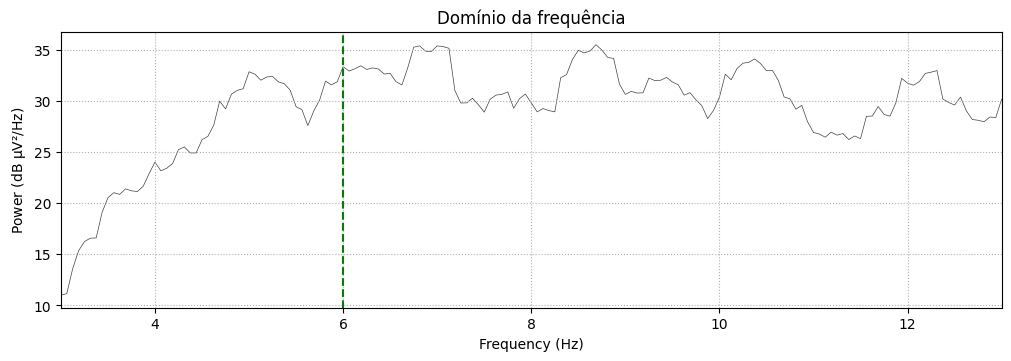

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


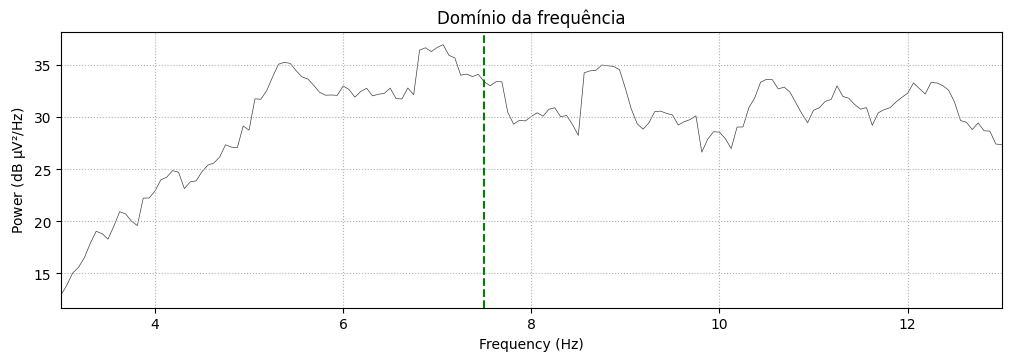

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


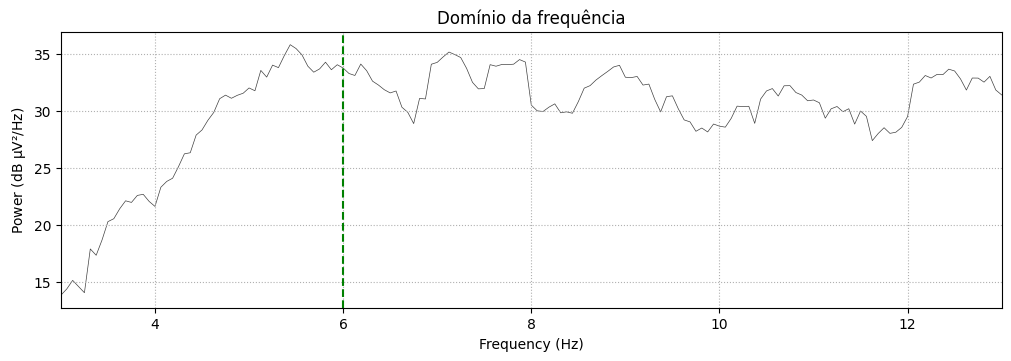

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


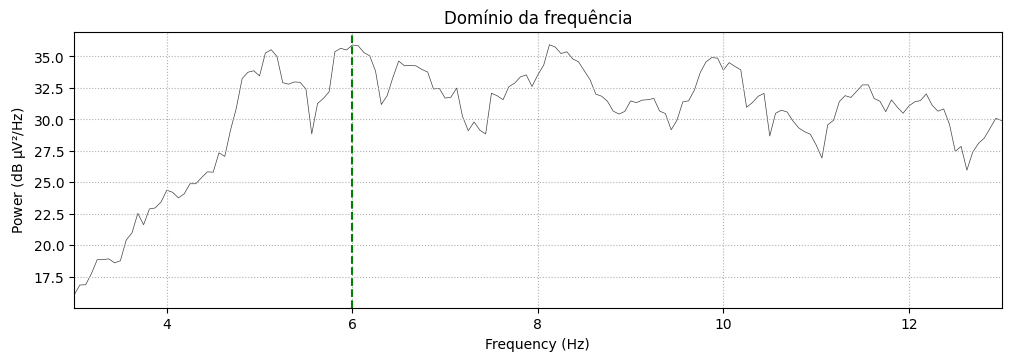

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


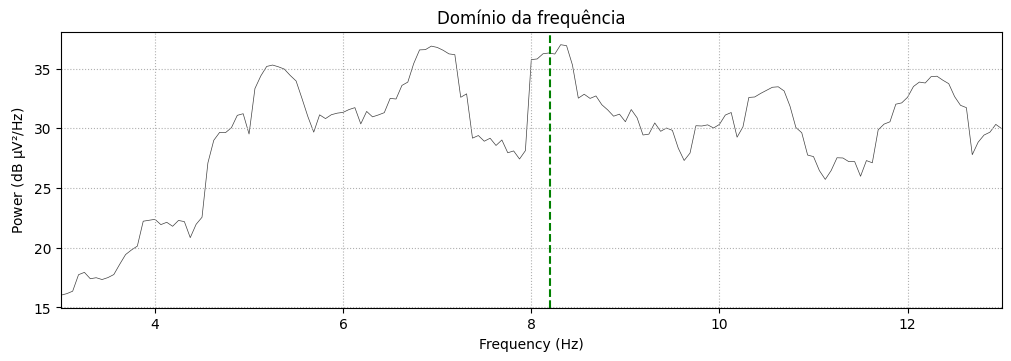

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


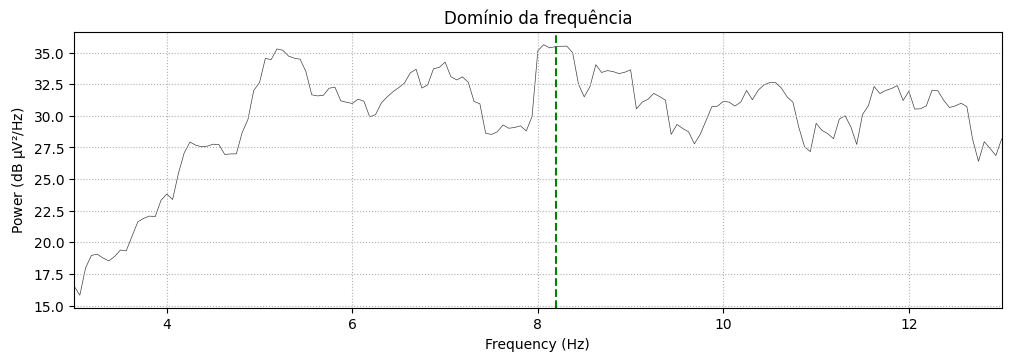

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


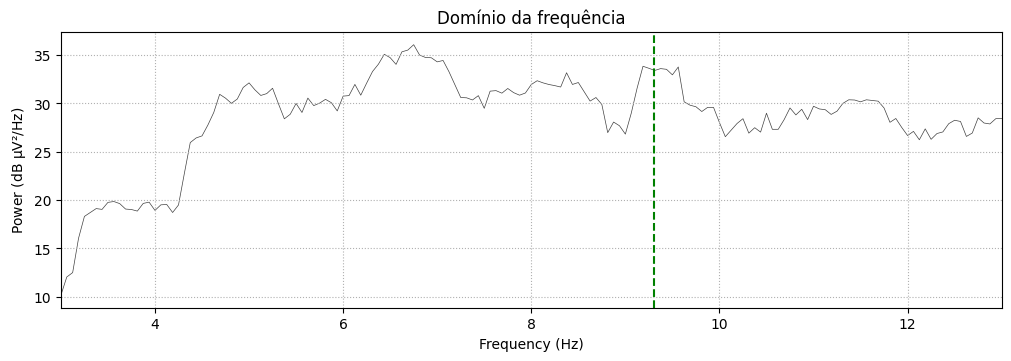

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


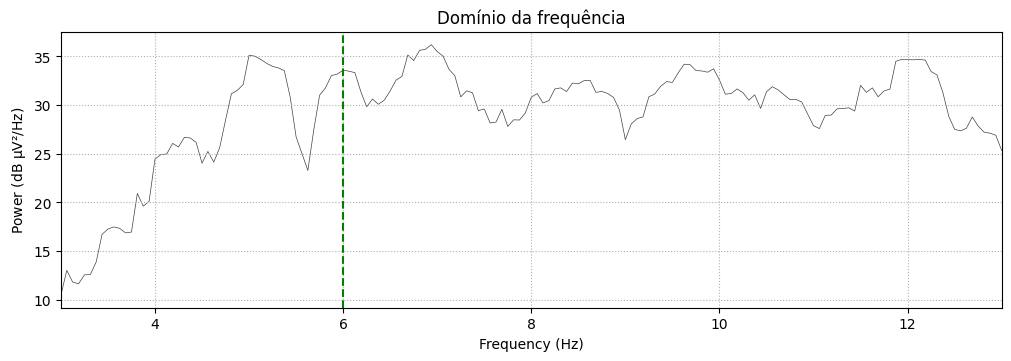

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


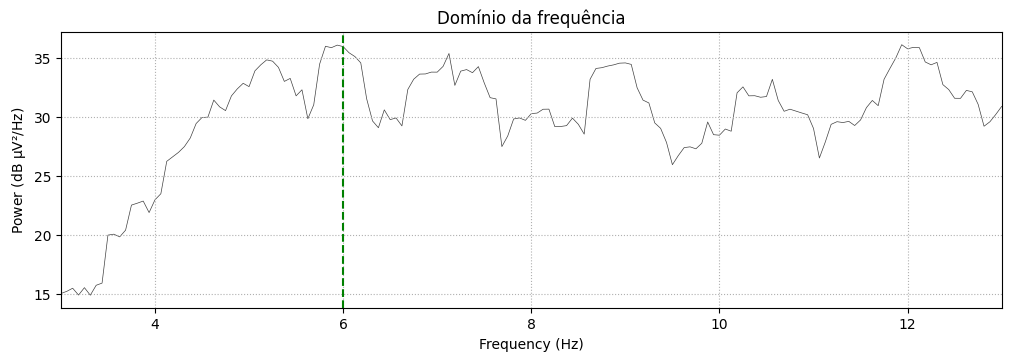

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


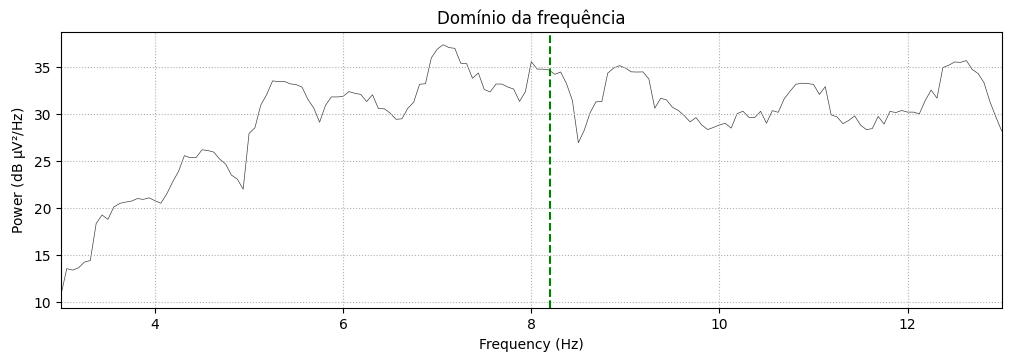

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


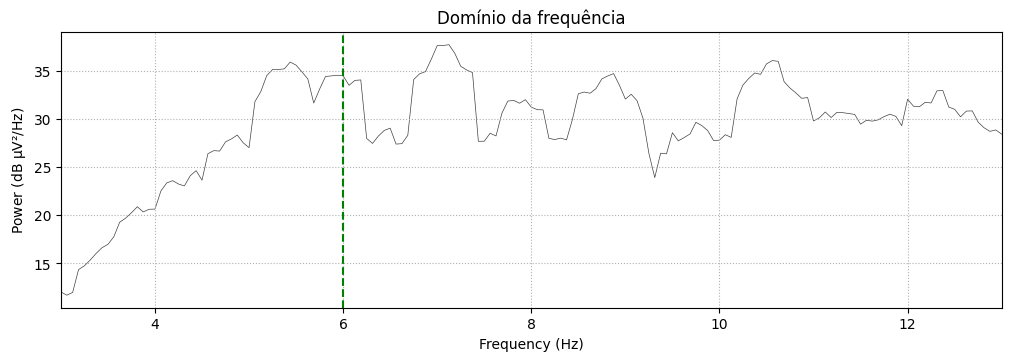

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


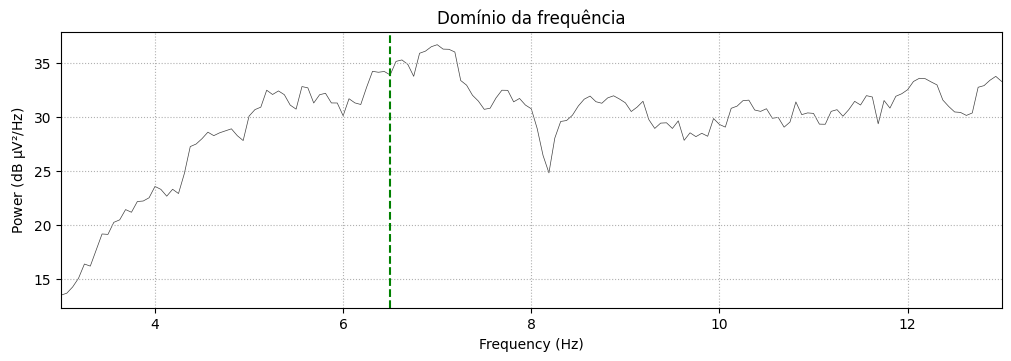

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


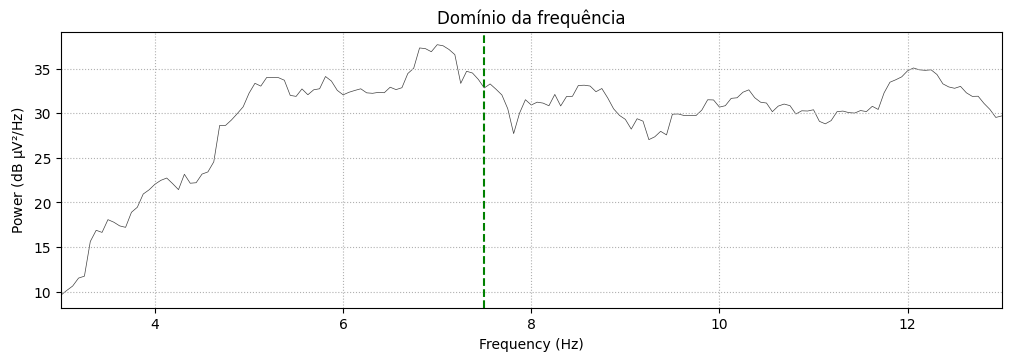

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


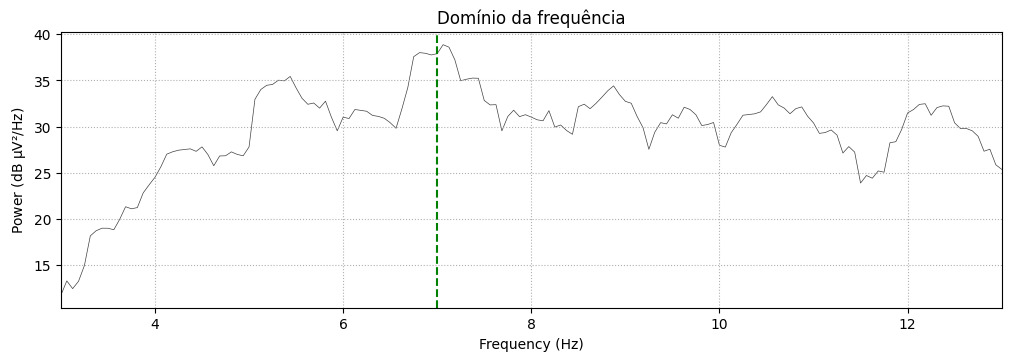

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


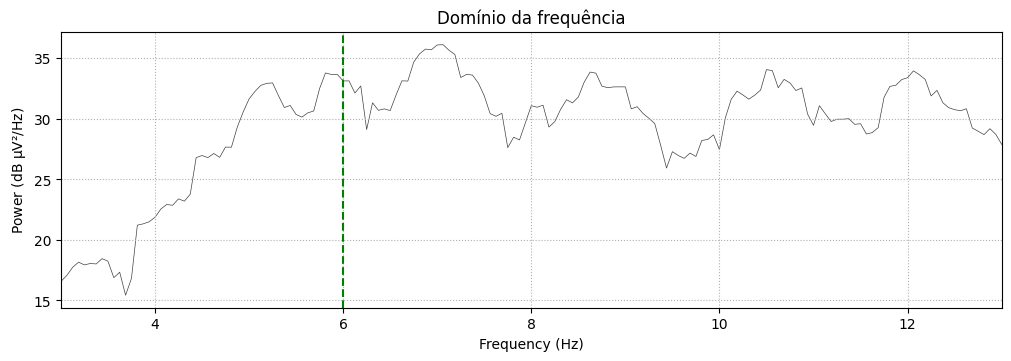

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


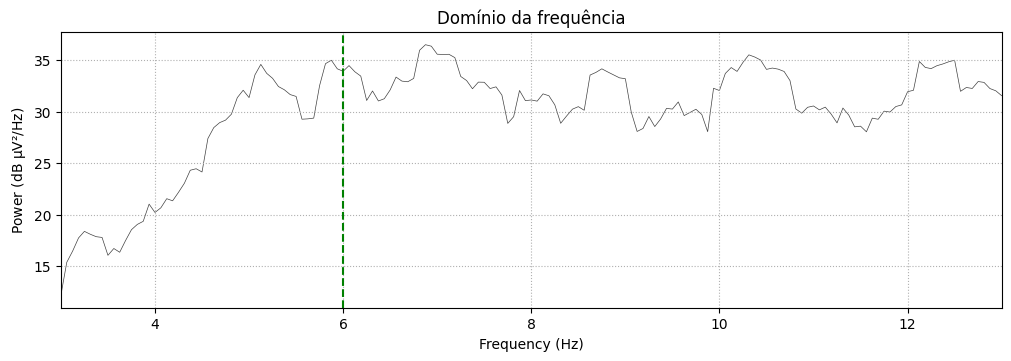

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


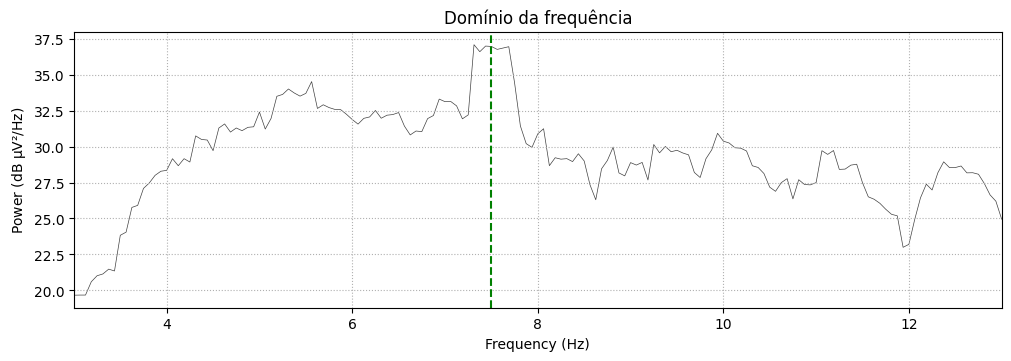

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


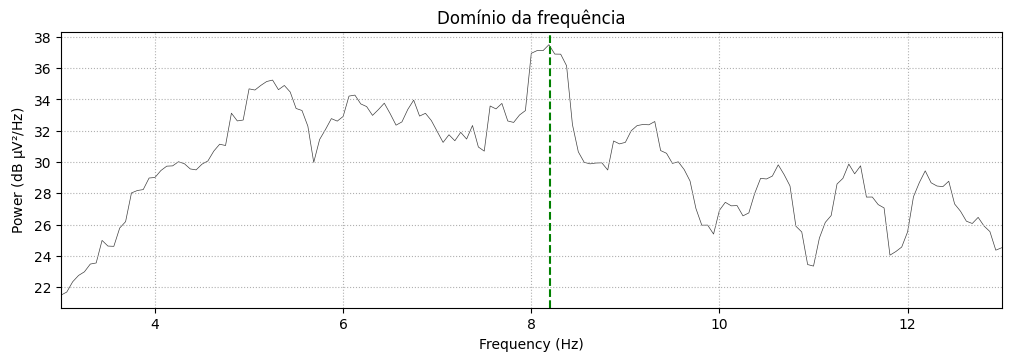

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


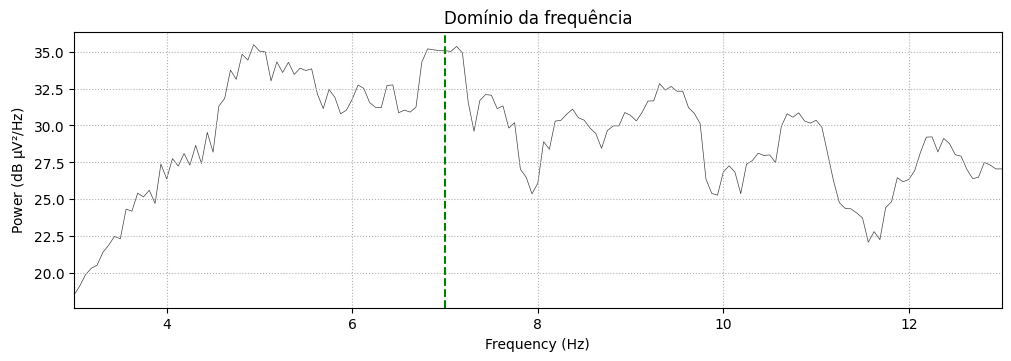

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


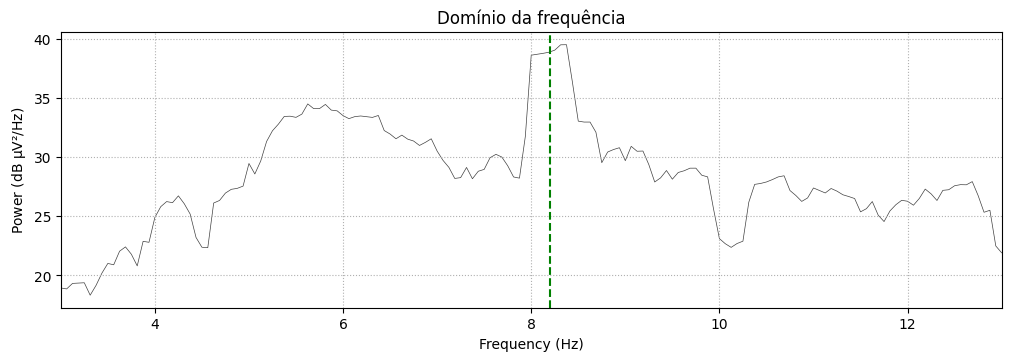

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


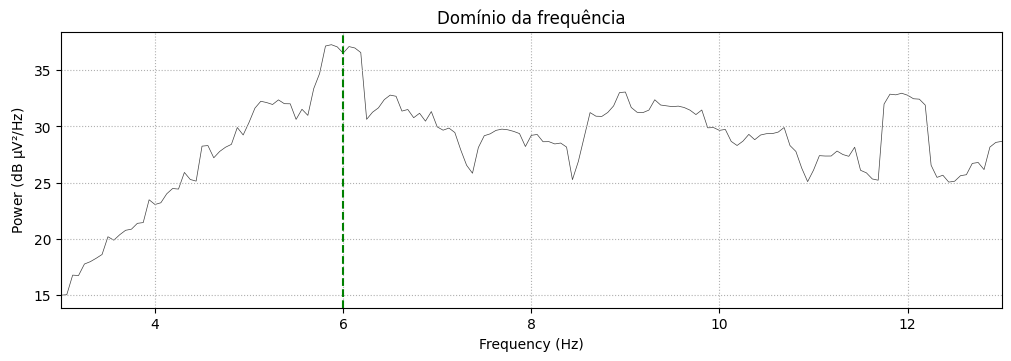

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


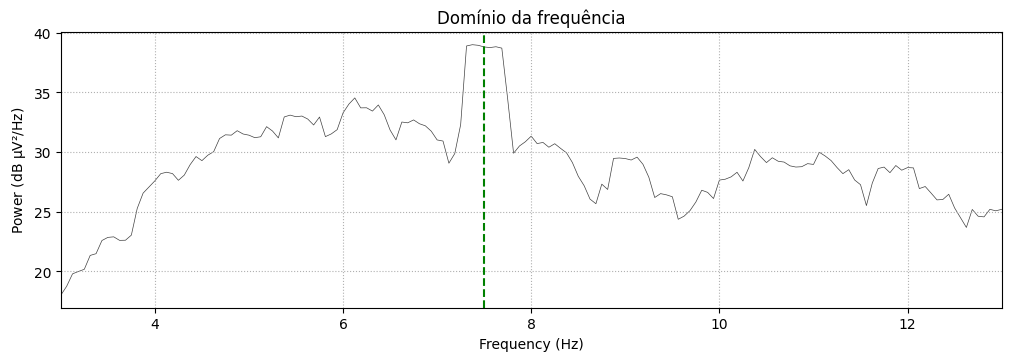

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


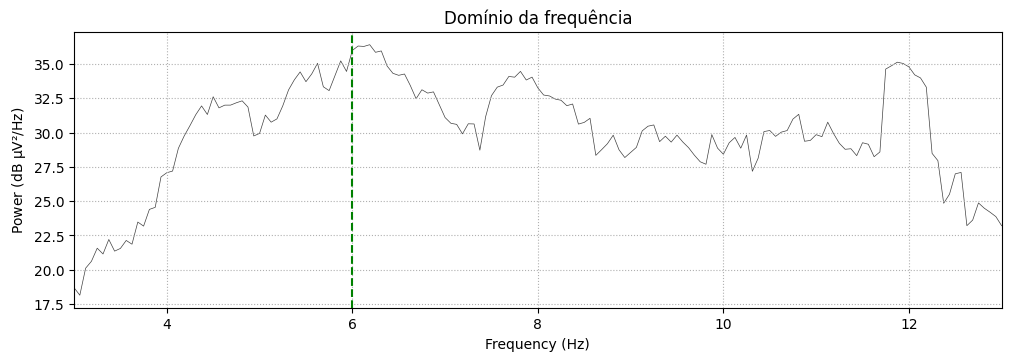

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


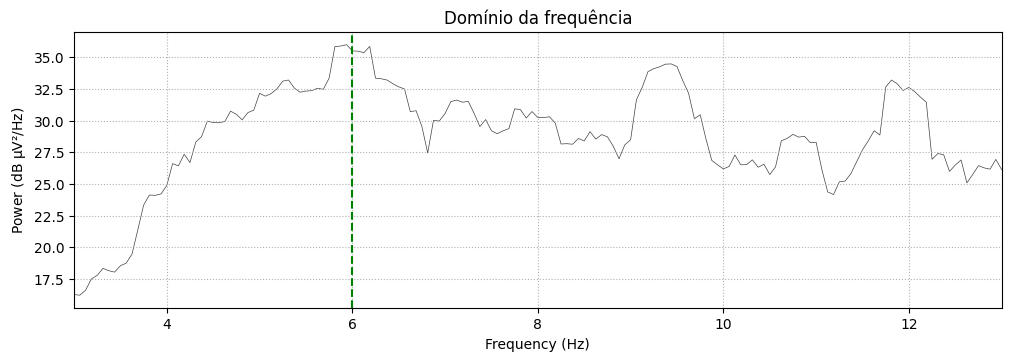

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


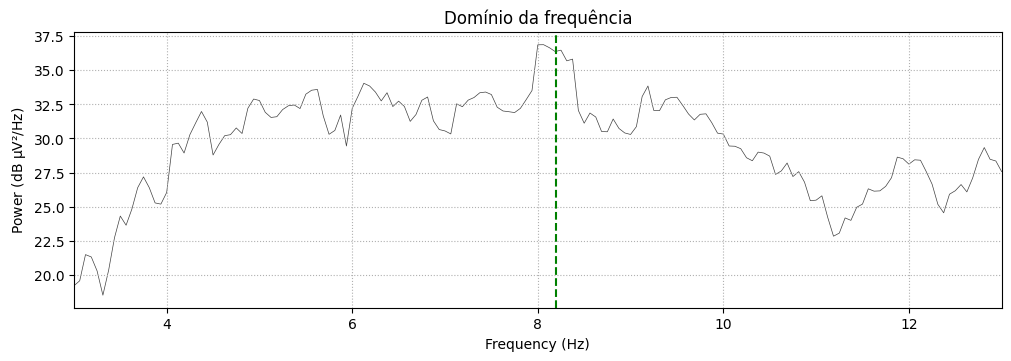

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


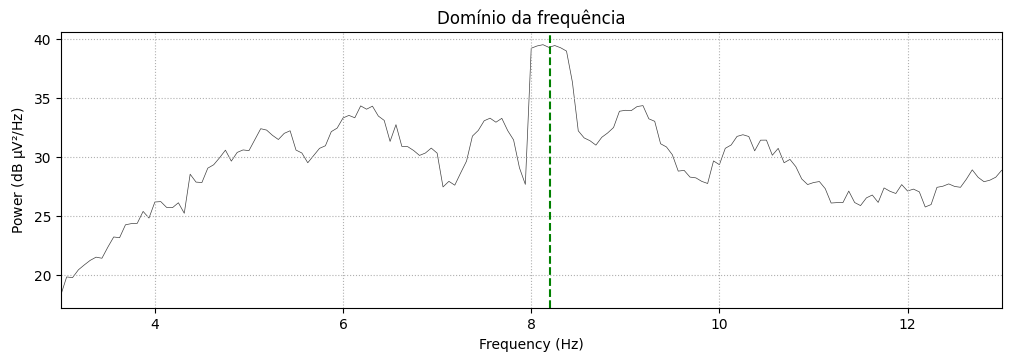

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


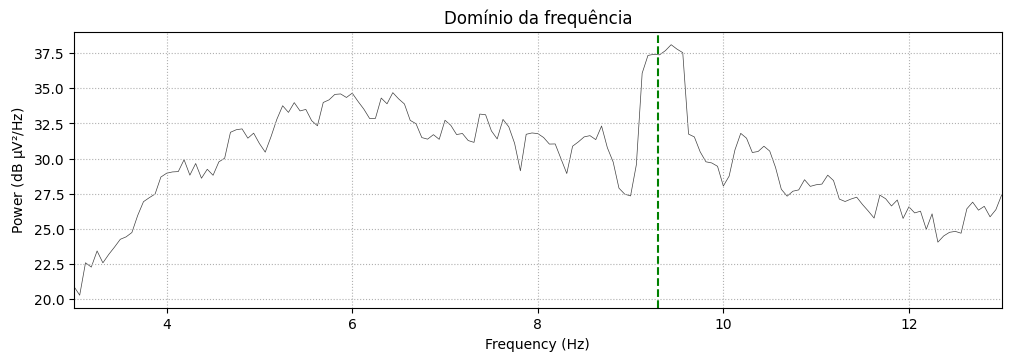

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


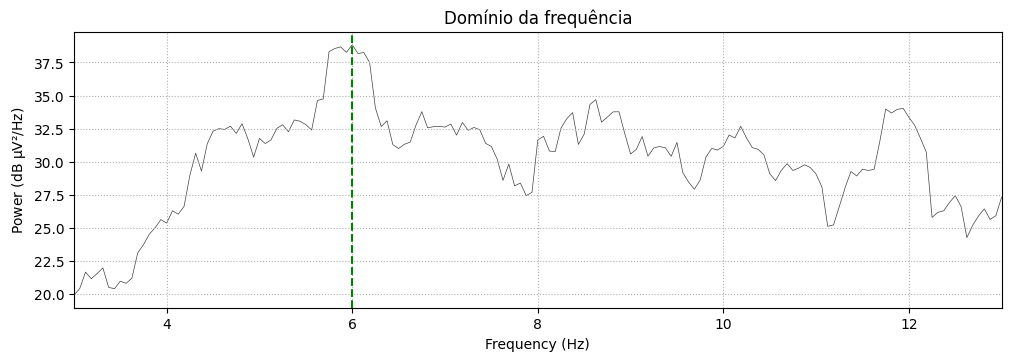

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


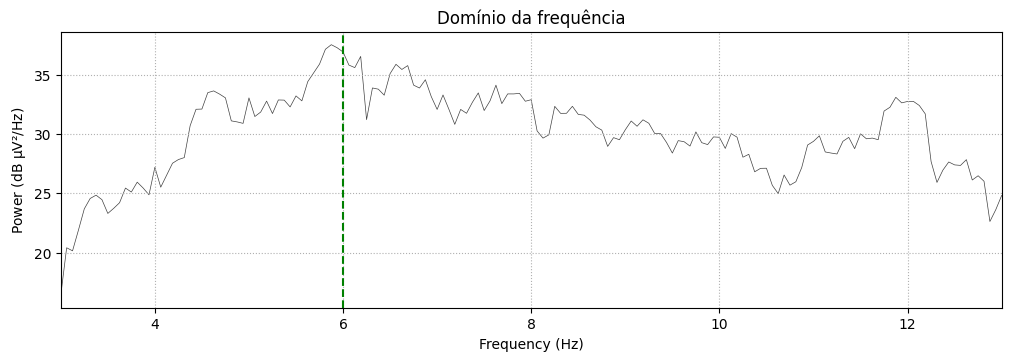

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


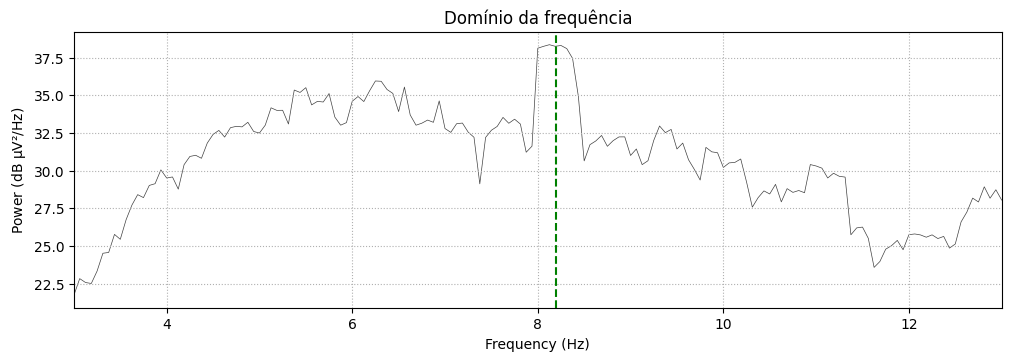

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


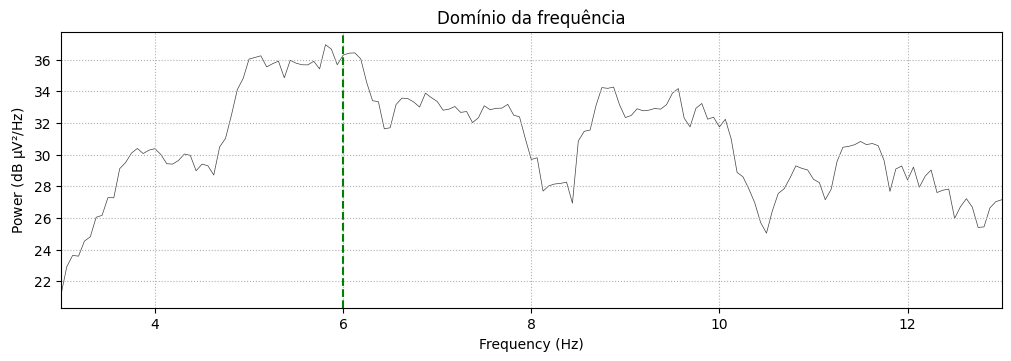

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


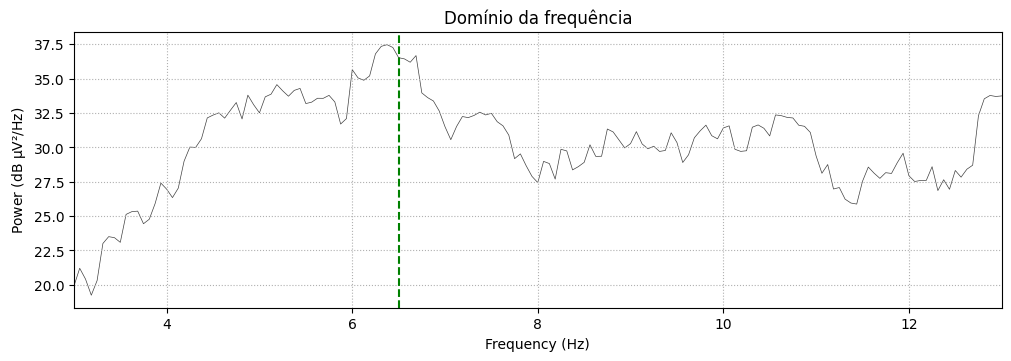

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


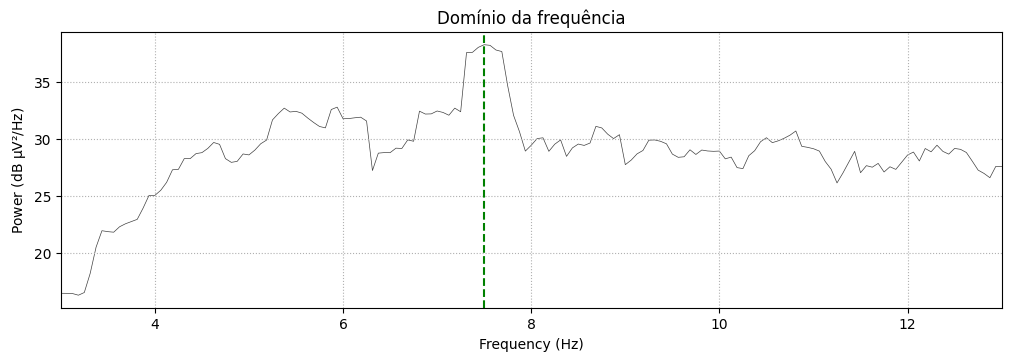

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


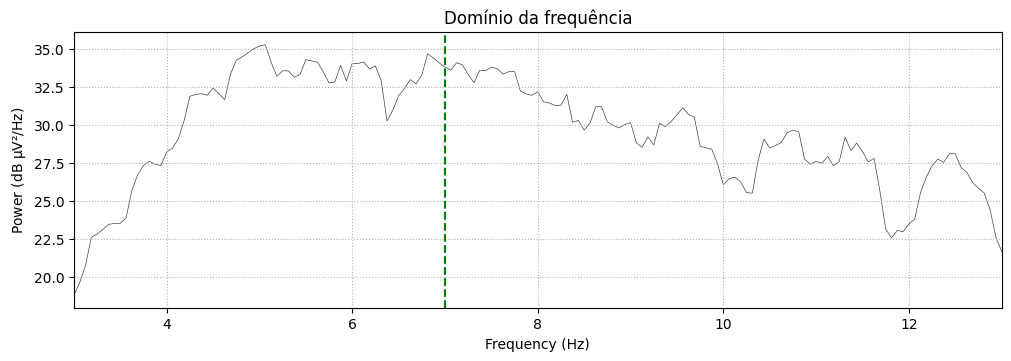

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


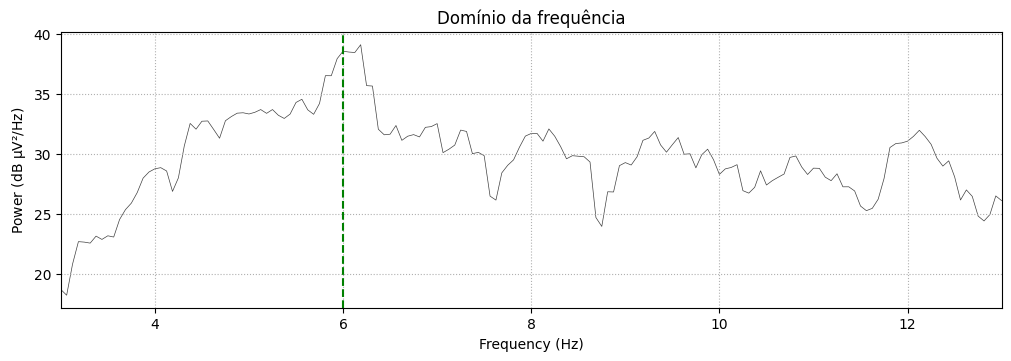

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


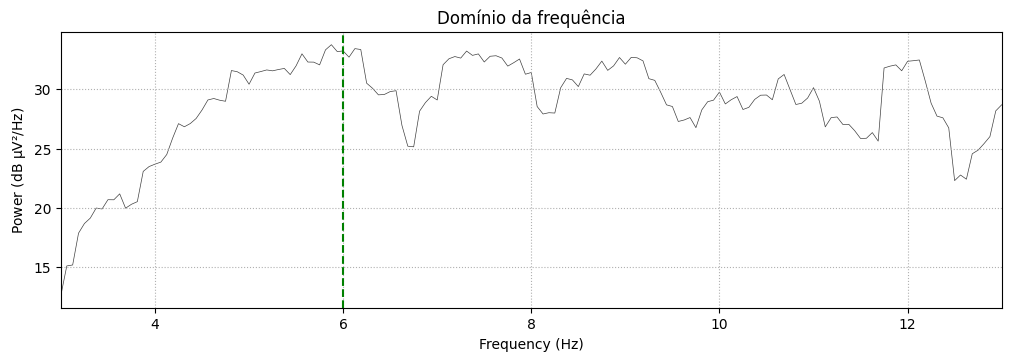

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


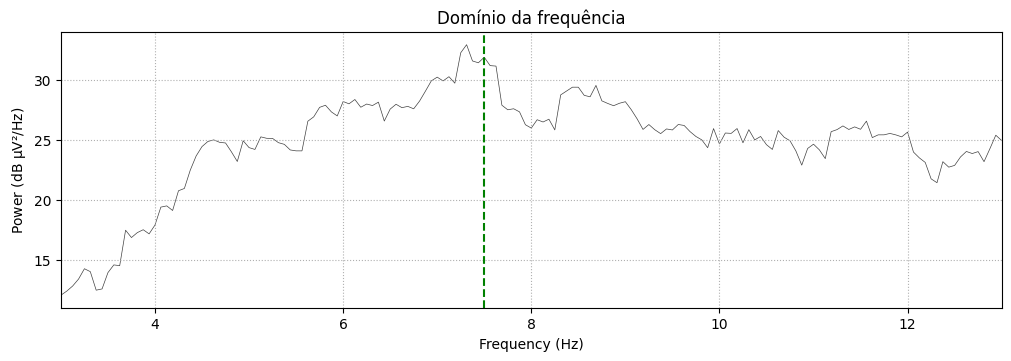

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


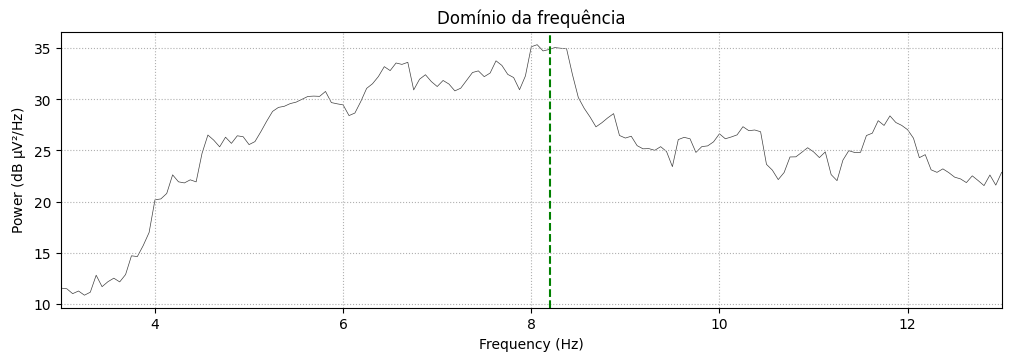

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


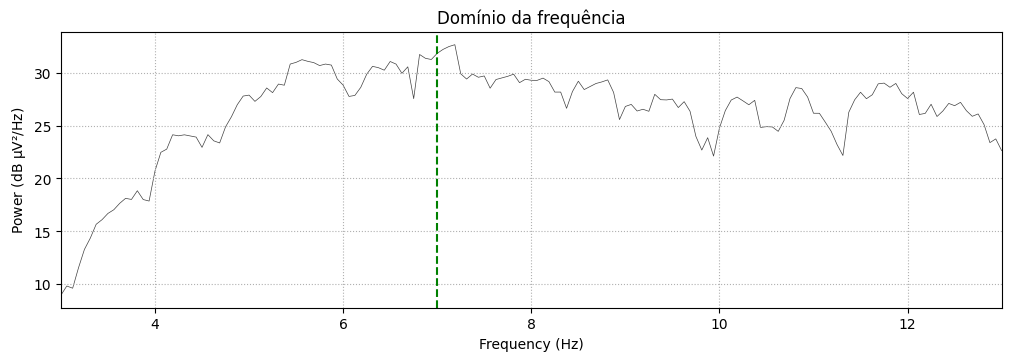

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


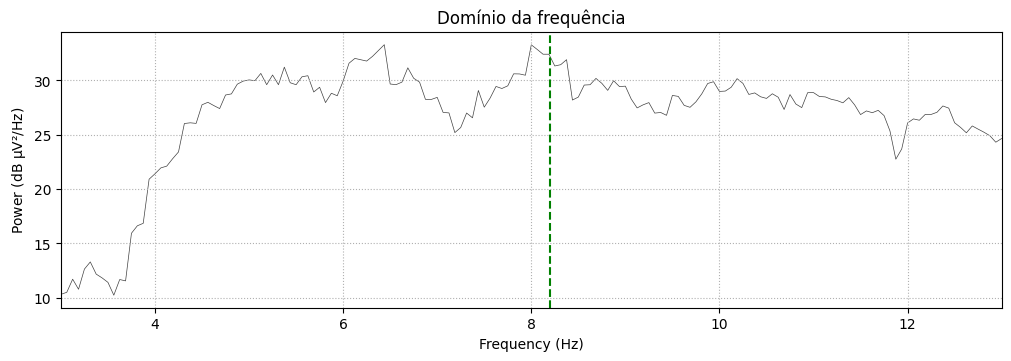

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


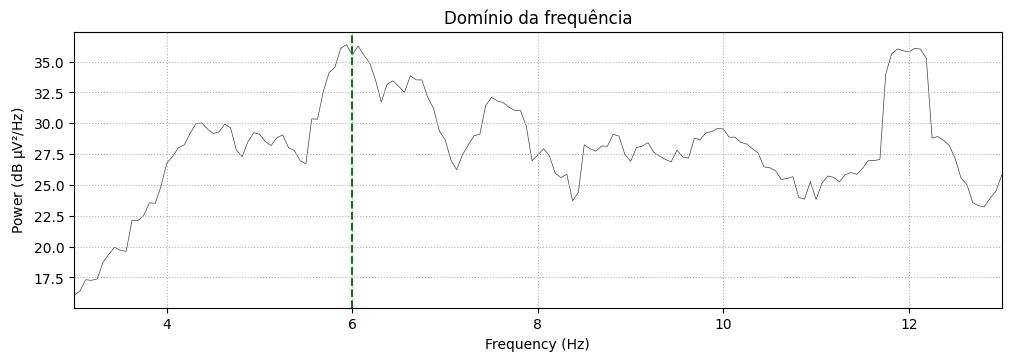

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


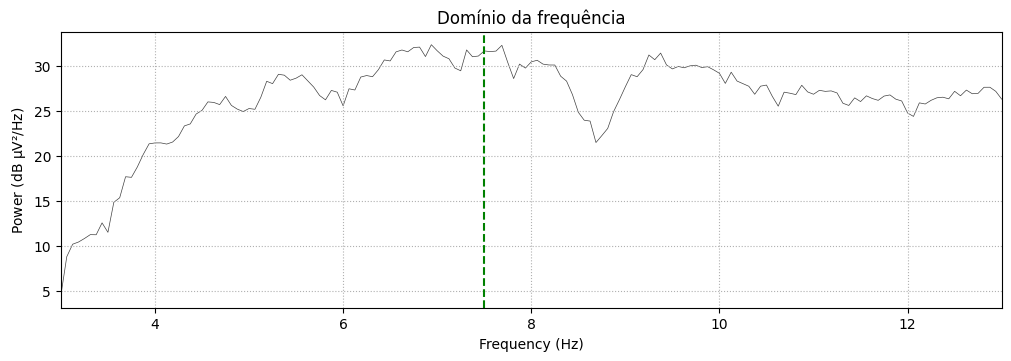

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


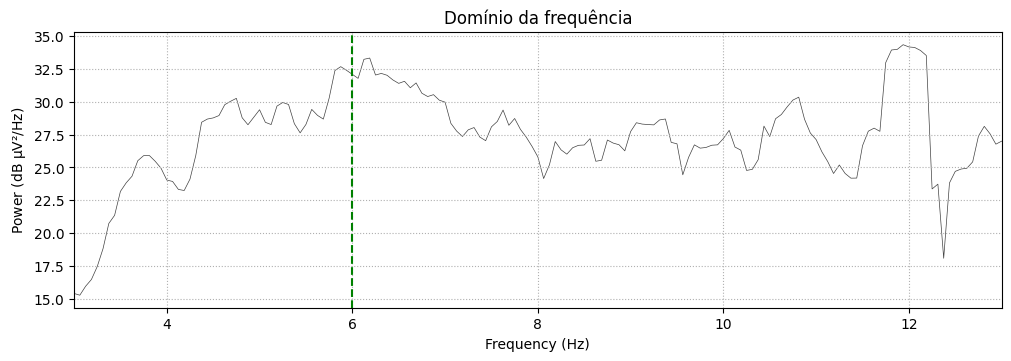

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


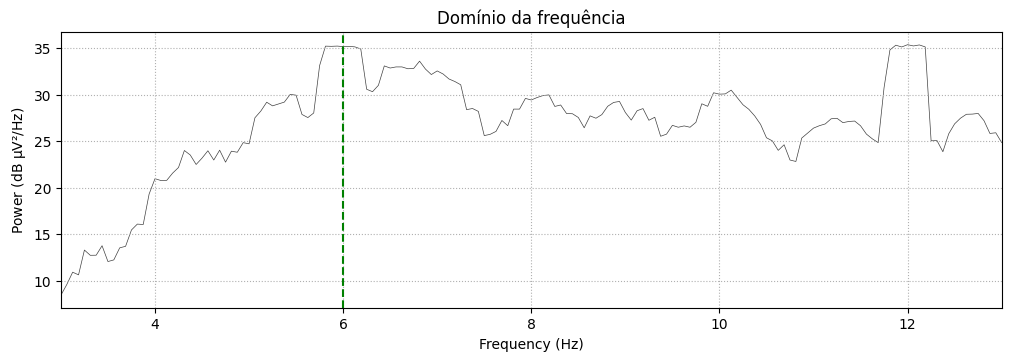

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


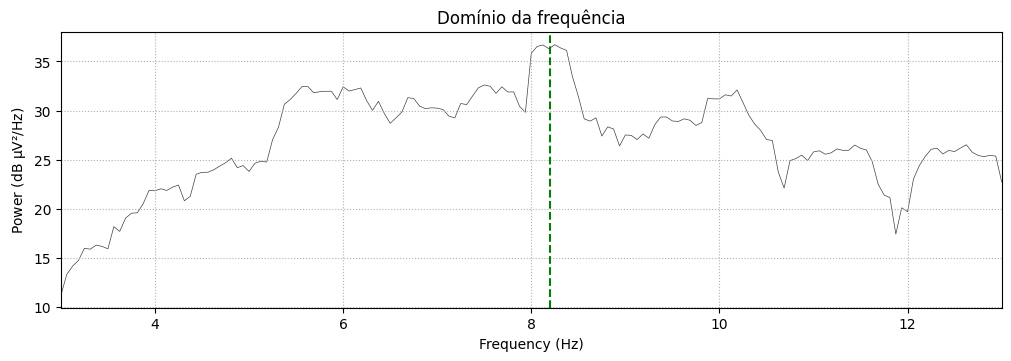

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


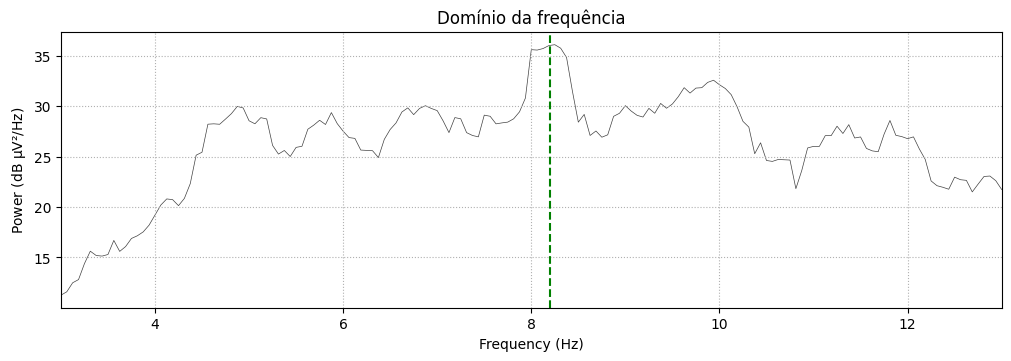

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


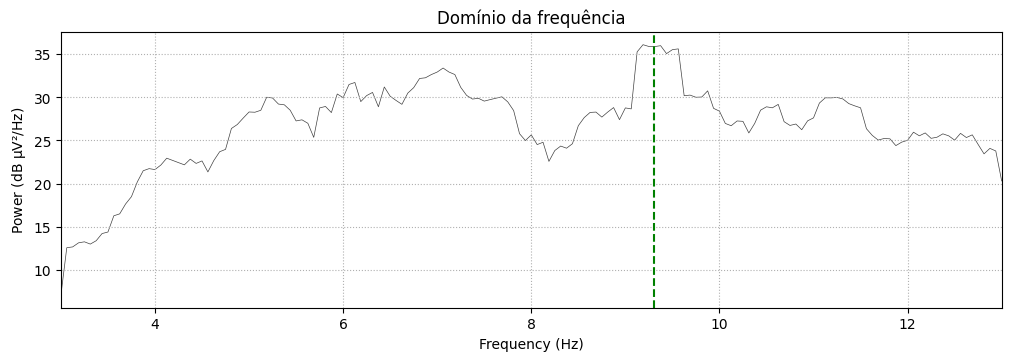

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


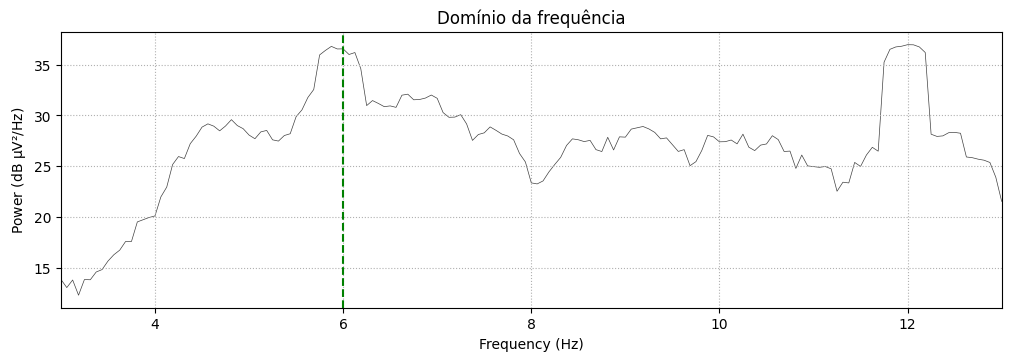

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


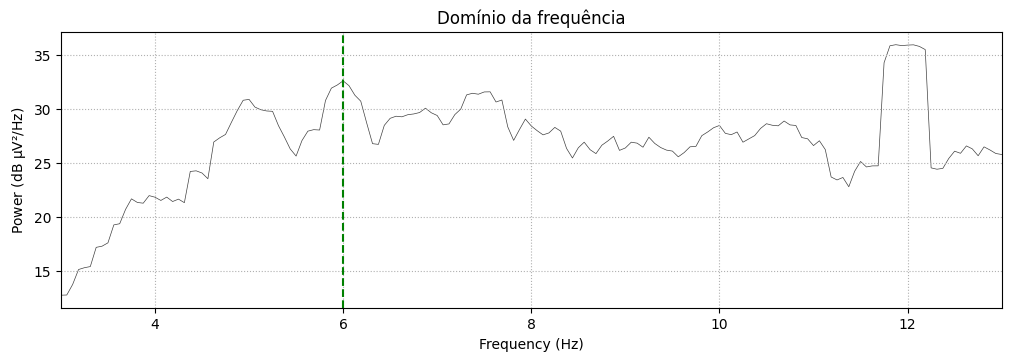

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


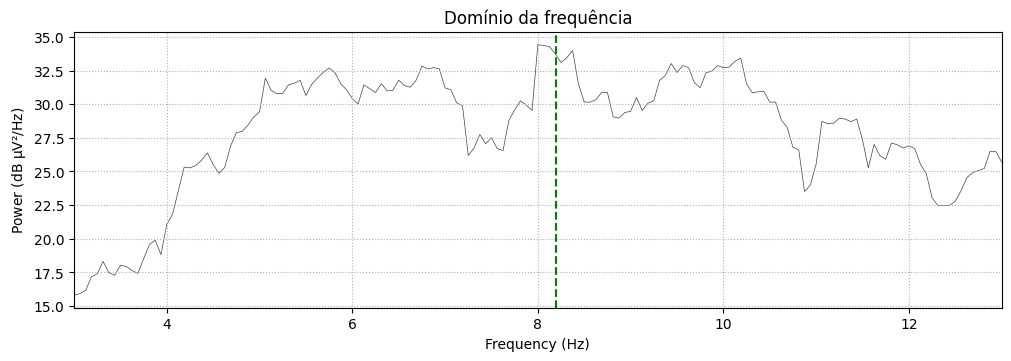

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


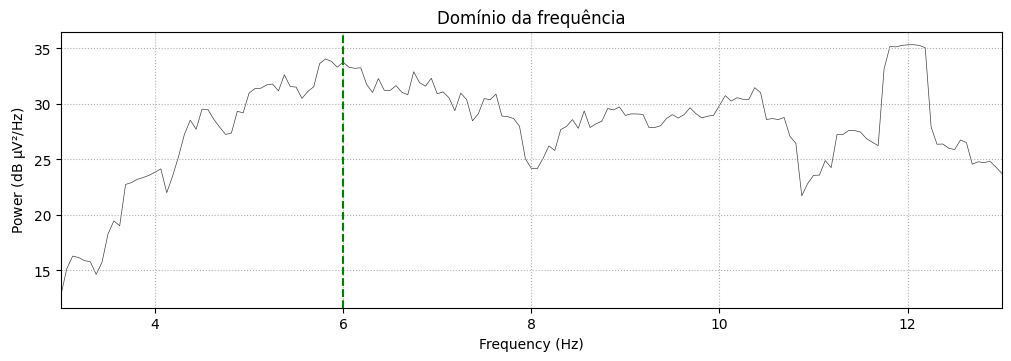

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


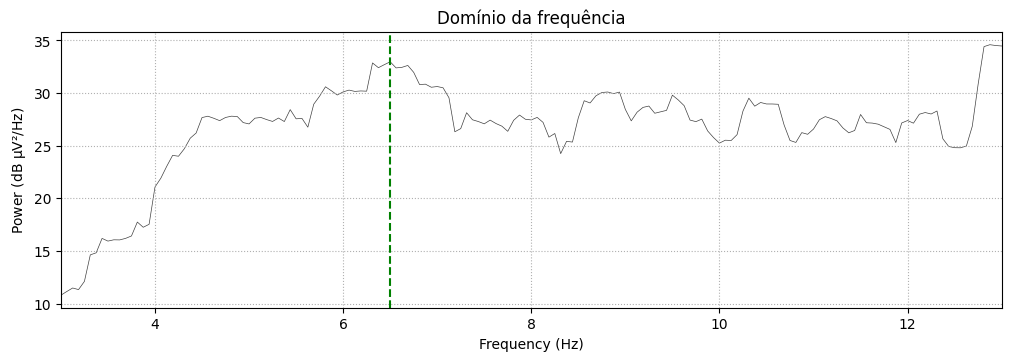

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


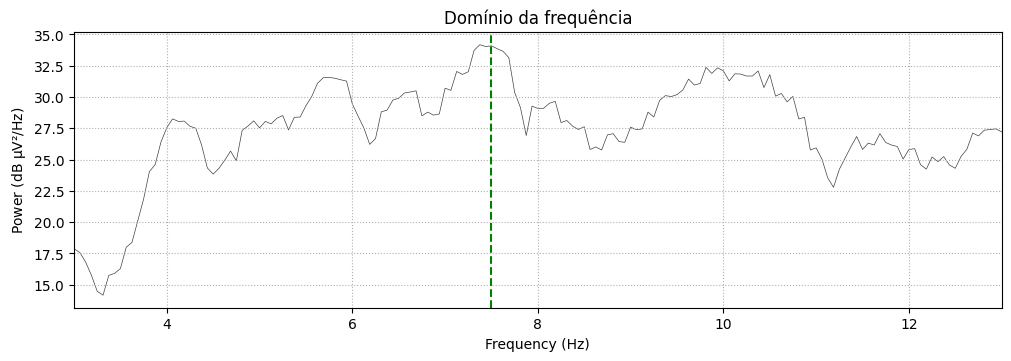

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


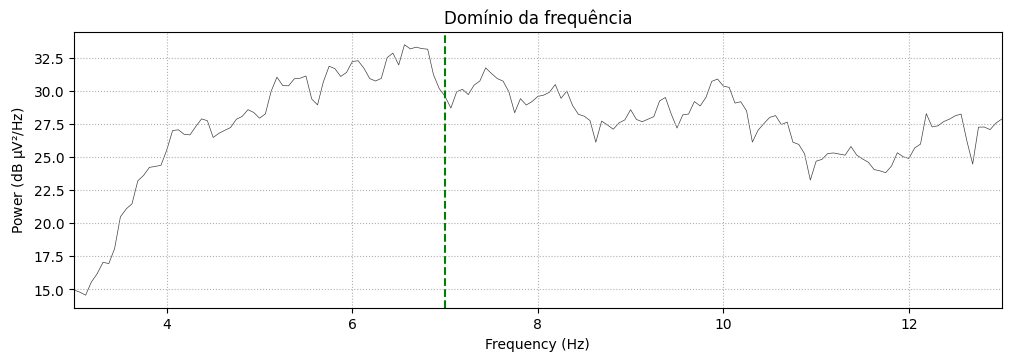

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


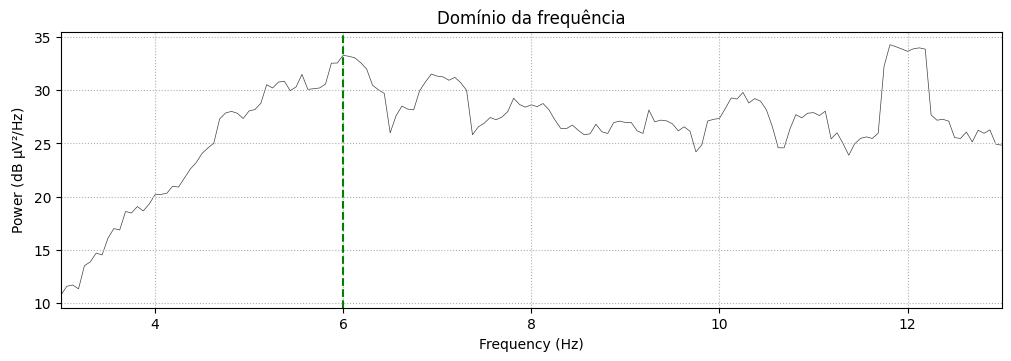

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


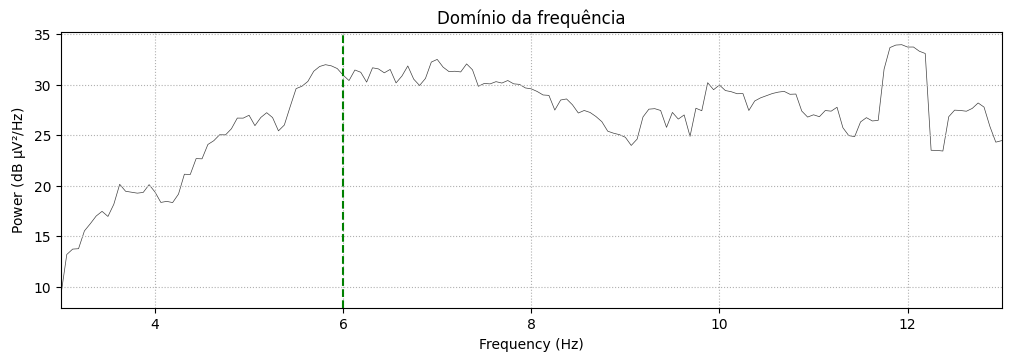

In [17]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

values = {6: 6, 6.5: 6.5, 7: 7, 7.5: 7.5, 8.2: 8.2, 9.3: 9.3, 10: 10}
labels, freqs = [], []
# view = mne_data.compute_psd(method='welch', fmin=3, fmax=13)
for i in range(len(mne_data)):
    view = mne_data[i].compute_psd(method='multitaper', fmin=3, fmax=13, verbose=False)
    view.plot(show=False)
    plt.title('Domínio da frequência')
    plt.axvline(x=float(list(mne_data[i].event_id)[0]), linestyle='--', color='green')
    plt.show()
print()

# Classificação por isolamento de frequência

Neste notebook será realizado um exemplo de classificação, isolando todas as frequências estimuladas no conjunto de dados AVI SSVEP simplificado para um participante.

### Passos para a realização da classificação:

1. Carrega o arquivo fif (mne.EpochsArray);
2. Obter a "energia" do sinal por meio do cálculo `compute_psd` para os dados no domínio do tempo;
4. Com os dados PSD, encontre o valor máximo para cada _trial_ e compare com o valor que está sendo evocado.
5. Por fim, acumule os acertos para mostrar uma acurácia simples.

In [18]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

values = {6: 6, 6.5: 6.5, 7: 7, 7.5: 7.5, 8.2: 8.2, 9.3: 9.3, 10: 10}
labels, freqs = [], []
# view = mne_data.compute_psd(method='welch', fmin=3, fmax=13)
for i in range(len(mne_data)):
    view = mne_data[i].compute_psd(method='multitaper', fmin=3, fmax=13, verbose=False)
    viewDF = view.to_data_frame()
    freq = viewDF['freq'][viewDF['Oz'] == viewDF['Oz'].max()].values[0]
    closest_freq = min(values, key=lambda x: abs(x - freq))
    freqs.append(closest_freq)
    labels.append(float(viewDF['condition'][0]))
print()

In [19]:
accs = [1 if freqs[i] == labels[i] else 0 for i in range(len(freqs))]

In [20]:
print(f'Acurácia: {100 * sum(accs)/100:.2f}%')

Acurácia: 57.00%


# Simulação de aplicação

O paradigma SSVEP é bastante utilizado em aplicações reais por ser fácil de evocar os sinais e posteriormente classificá-los.

Para processar uma aplicação SSVEP em tempo real é necessário calcular a máxima energia dos _targets_ em janelas ou _buffers_ suficientemente grandes. O tamanho da janela de dados é inversamente proporcional a taxa de amostragem do equipamente de EEG utilizado. Ou seja, quanto maior a taxa de amostragem, menor o tempo decessário para calcular a **energia deslizante do sinal**.

**Tarefa**: simule uma aplicação SSVEP criando um buffer do sinal no domínio do tempo em uma única dimensão. Se inicialmente a dimensão dos dados era `(100, 8192)`, agora será `(819200)`. Crie um buffer de 3 ou 4 segundos, informando a cada segundo qual está sendo a frequência evocada.

In [26]:
buffer = concatenated_X.reshape(819200)
buffer_size = buffer.shape[0]
buffer.shape

(819200,)

In [31]:
buffer_length = 4 * sfreq  # 4 segundos
window_length = sfreq  # 1 segundo
step = sfreq  # 1 segundo

evoked_freqs = []

for start in range(0, buffer_size - buffer_length + 1, step):
    end = start + buffer_length
    segment = buffer[start:end].reshape(1, -1)
    
    # Criar objeto EpochsArray para o segmento
    segment_epochs = mne.EpochsArray(segment.reshape(1, 1, -1), info)
    
    # Calcular PSD
    psd = segment_epochs.compute_psd(method='multitaper', fmin=3, fmax=13, verbose=False)
    psd_df = psd.to_data_frame()
    
    # Identificar frequência evocada
    freq = psd_df['freq'][psd_df['Oz'] == psd_df['Oz'].max()].values[0]
    closest_freq = min(values, key=lambda x: abs(x - freq))
    evoked_freqs.append(closest_freq)
    
    print(f"Segundo {start // sfreq + 1}: Frequência evocada = {closest_freq} Hz")




Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
1 matching events found
No baseline correction applied
0 projection items activated
Segundo 1: Frequência evocada = 7.5 Hz
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Segundo 2: Frequência evocada = 6.5 Hz
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Segundo 3: Frequência evocada = 7 Hz
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Segundo 4: Frequência evocada = 6.5 Hz
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Segundo 5: Frequência evocada = 6.5 Hz
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Segundo 6: Frequência evocada = 6.5 Hz
Not setting metadata
1 matching events found
No baseli